# Project : CreditCard Users Churn Prediction

**Background & Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

**Objective**

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

**Data Dictionary:**
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

## Import Libraries

In [1]:
# Libraries for math, data handling and displaying graphs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get differnt metric scores, and split data
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# Libraries for up and down sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Displaying graphs in Jupyter Notebooks with more style
%matplotlib inline
sns.set(color_codes=True)

## Load dataset and display summary

In [2]:
dfChurn = pd.read_csv("BankChurners.csv") # reading in the dataset
data = dfChurn.copy() # creating a copy of the dataset to work with and manipulate

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Unnamed: 21  
0                  0.061          NaN  
1                  0.105          NaN  
2                  0.000          NaN  
3                  0.760          NaN  
4                  0.000          NaN  

[5 rows x 22 columns]

In [4]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
10122              40  ...                      3        4003.0   
10123              25  ...                      3        4277.0   
10124              36  ...                      4        5409.0   
10125              36  ...                      3        5281.0   
10126              25  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60                0.818   
10125             8395              62                0.722   
10126            10294              61                0.649   

       Avg_Utilization_Ratio  Unnamed: 21  
10122                  0.462          NaN  
10123                  0.511          NaN  
10124                  0.000          NaN  
10125                  0.000          NaN  
10126                  0.189          NaN  

[5 rows x 22 columns]

- The last column seems to not contain any information.  We will check if it is truly empty before we drop it.
- `CLIENTNUM` will probably be dropped as IDs usually do not give information for our model to learn from.
- There is an unknown value in education.  We should check to see if there are more unknown type values later.

### Checking on missing data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
data.isna().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

- All of the values in the last column (`Unnamed: 21`) are null.  We can drop it as it is empty.
- There are no null values for the other columns, however there may be entries that were entered incorrectly and need to be fixed.
- There is a mixture of strings, i.e. objects, and number data types.  The objects will need to be given dummy variables eventually.

We will drop `CLIENTNUM` and `Unnamed: 21` columns as they do not contain information for our model to learn.

In [7]:
data.drop(columns=["CLIENTNUM", "Unnamed: 21"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### Summary of dataset

In [8]:
data.describe().T # showing the summary for numerical features

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

- `Customer_Age` has a mean and median that are nearly the same at ~ 46 years.
    - The range is over normal ages ranging from 26 to 73.
- The number of dependents customers have is skewed to the right i.e. towards having more children.  The maximum value is 5 children.
- `Months_on_book` shows the customers in this dataset have been with the bank at least a year since the minimum value is 13 months.  The distribution is not skewed.
- The mean and median of `Total_Relationship_Count` show it is skewed somewhat to the left.
- At least 75% of customers have been inactive for at least 2 months during the past year.
    - `Months_Inactive_12_mon` is skewed to the right.  The maximum value is 6 months i.e. the customer has been inactive for half of the past year.
- `Contacts_Count_12_mon` has a similar mean and five number summary as `Months_Inactive_12_mon`.
    - This may be because the bank contacts the customers when they have been inactive during a month.
- Customer's credit limits are highly skewed to the right with a mean nearly double the median.  The maximum value is ~34K.
- Some customers have a total revolving balance of zero, which may indicate they do not use the credit card and thus are at a higher risk of churning.
- `Avg_Open_To_Buy` is highly skewed to the right like credit limit.  Though with a minimum value of three.
- Some customers have zero change between Q4 and Q1.
- `Avg_Utilization_Ratio` is skewed towards the right i.e. the mean is closer to one.
    - The median shows most customers use only ~17.6% of their credit limit.

In [9]:
data.describe(include="O").T # showing the summary for object features

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

- The target variable `Attrition_Flag` is mostly made up of existing customers.  The classes may need to be balanced later on.
- There are roughly equal numbers of female and male customers in the dataset.
- There are seven unique education values, the most frequent being Graduate.
- Nearly half of customers in the dataset are married.
- The most frequent `Income_Category` value is less than 40K dollars.
- Nearly all customers held a Blue card.

**Checking the count of each unique category in the categorical variables.** 

In [10]:
# List of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Total_Relationship_Count",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"
]

In [11]:
# Printing the counts of unique values for each column
for col in cat_col:
    print(data[col].value_counts())
    print("-"*40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +    

- `Education_Level` has a value of "Unknown" that is the third most frequent education value.
- The "Unknown" value in `Marital_Status` has approximately the same frequency as "Divorced."
- Under `Income_Category` roughly 10% of customers are listed as "Unknown."
- We have 8500 customers who have kept their account compared to 1627 customers who have left.
- Income seems to follow a normal trend of fewer people making more money.

## EDA

### Univariate Analysis

In [12]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # number of rows of the subplot grid = 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color="violet") # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(x=feature, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color="green", linestyle="--", label="Mean = "+str(round(np.mean(feature),2))) # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color="black", linestyle="-.", label="Median = "+str(round(np.median(feature),2))) # Add median to the histogram
    ax_hist2.legend()

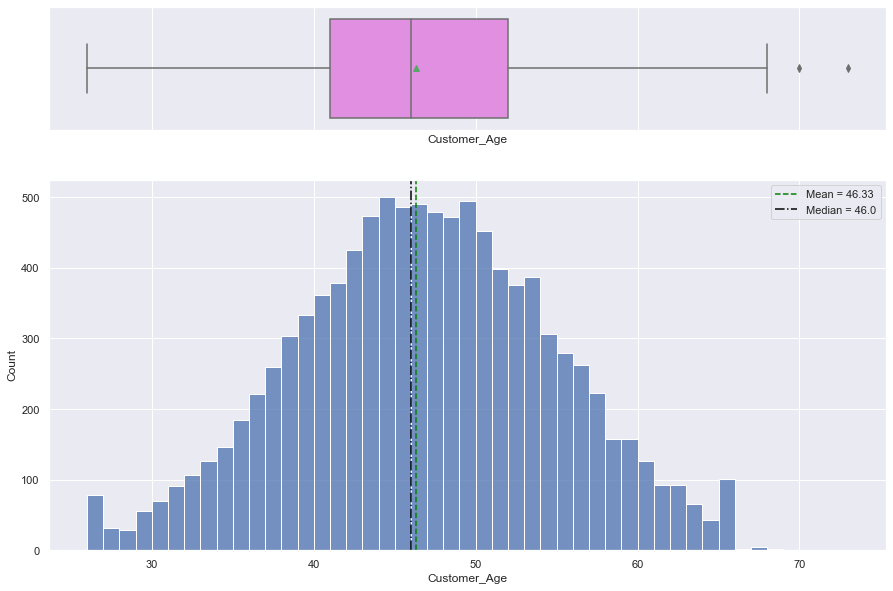

In [13]:
# Observations on Age
histogram_boxplot(data["Customer_Age"])

- Age is fairly normally distributed with nearly the same mean and median.
- There are two outliers on the high end of age.  We will not treat them since that comes with the normal distribution of age in society.

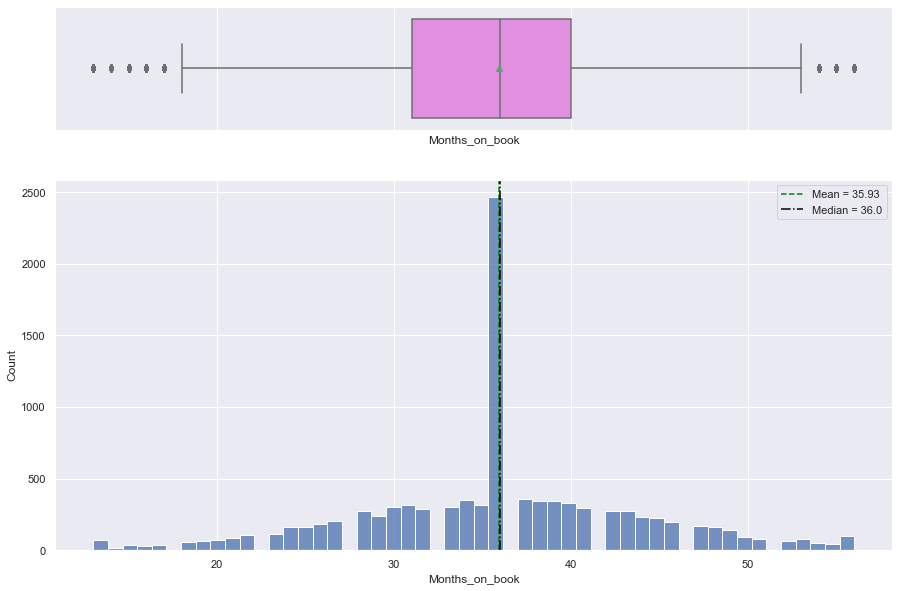

In [14]:
# Observations on Months_on_book
histogram_boxplot(data["Months_on_book"])

- There is a very large spike at 36 months (i.e. three years).  Apparently the bank had almost 25% of their customers join about 36 months ago.
    - This might be a result from a major marketing campaign or perhaps an aquisition of another bank.
- The distribution is rather symmetrical with approximately equal mean and median.

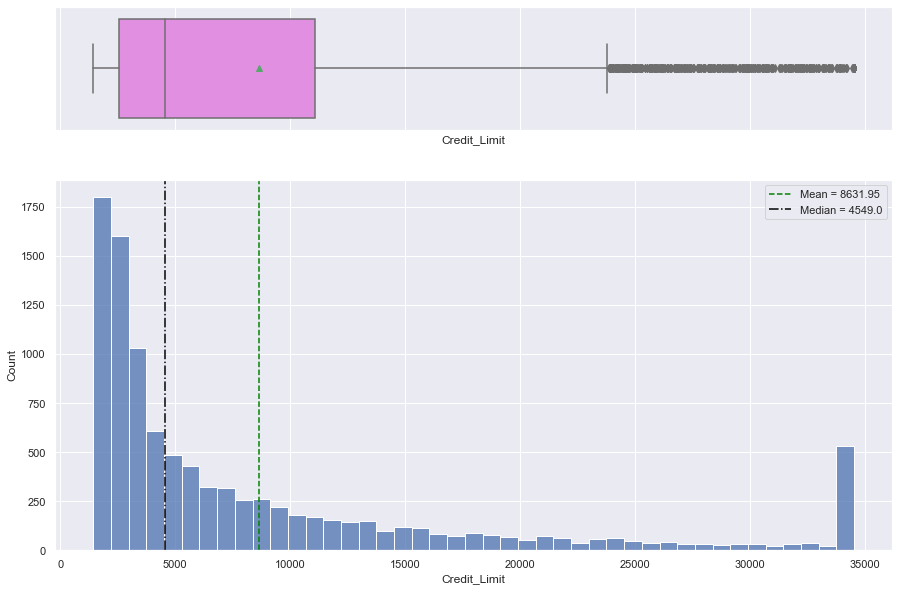

In [15]:
# Observations on Credit_Limit
histogram_boxplot(data["Credit_Limit"])

- `Credit_Limit` is very skewed to the right with a mean nearly twice the median.
- There is a large spike in frequency at nearly 35,000.
- We will not treat the outliers as this is an example of market fluctuation with customers' credit limits.

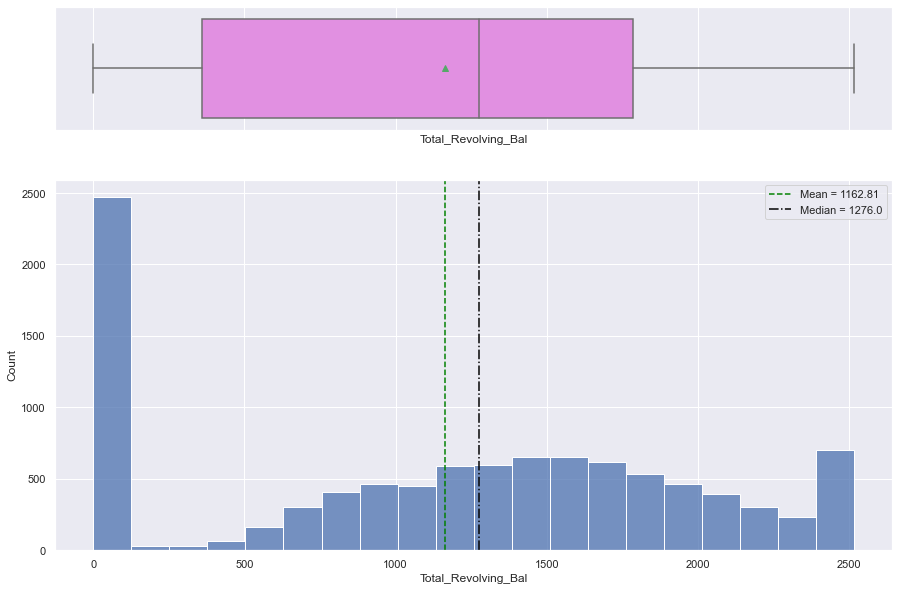

In [16]:
# Observations on Total_Revolving_Bal
histogram_boxplot(data["Total_Revolving_Bal"])

- Nearly a quarter of customers have a revolving balance around zero.  This may point to customers who are more likely to drop the bank.
- Besides the far left and right spikes, the distribution is relatively symmetrical with some skewness to the left.

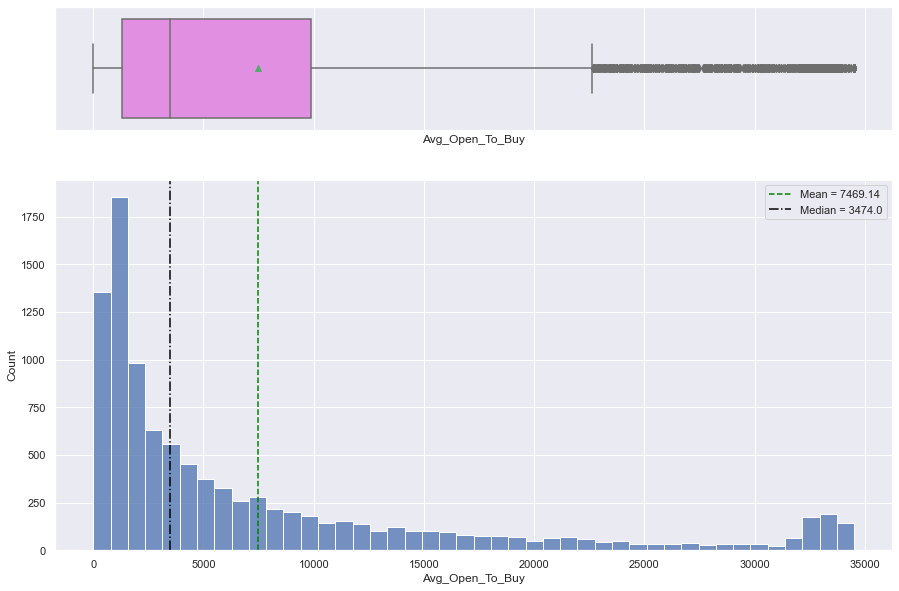

In [17]:
# Observations on Avg_Open_To_Buy
histogram_boxplot(data["Avg_Open_To_Buy"])

- This shows that the majority of customers have less than 5,000 dollars available to spend on their credit card.
- There are some customers who have tens of thousands open on their credit card.
    - This may point to a lack of use, however having an open to buy value of greater than 90% of your total can significantly increase a customer's credit score.  Therefore, they may still be using the card routinely, just paying it off right away.
- The distribution is skewed to the right as is expected.  The majority of customers have less than 10K as their credit limit.

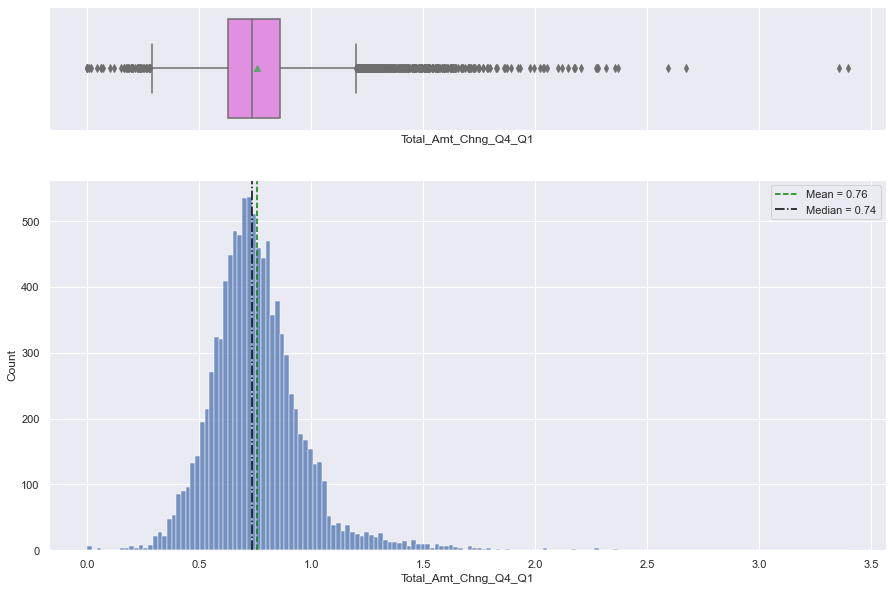

In [18]:
# Observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

- There are many outliers but only a few are very far out on the right.
    - We can check to see if those extreme outliers have the same `Attrition_Flag` value.
- The overall distribution is fairly symmetric with close mean and median values.

In [19]:
# Printing the customers with the 5 highest Total_Amt_Chng_Q4_Q1
data.iloc[data["Total_Amt_Chng_Q4_Q1"].nlargest(5).index].sort_values(by="Total_Amt_Chng_Q4_Q1", ascending=False)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
12   Existing Customer            56      M                1         College   
8    Existing Customer            37      M                3      Uneducated   
773  Existing Customer            61      M                0   Post-Graduate   
2    Existing Customer            51      M                3        Graduate   
219  Existing Customer            44      F                3      Uneducated   

    Marital_Status Income_Category Card_Category  Months_on_book  \
12          Single    $80K - $120K          Blue              36   
8           Single     $60K - $80K          Blue              36   
773        Married         Unknown          Blue              53   
2          Married    $80K - $120K          Blue              36   
219       Divorced  Less than $40K        Silver              38   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
12                          3                       6                      0   
8                           5                       2                      0   
773                         6                       2                      3   
2                           4                       1                      0   
219                         4                       1                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
12        11751.0                    0          11751.0                 3.397   
8         22352.0                 2517          19835.0                 3.355   
773       14434.0                 1927          12507.0                 2.675   
2          3418.0                    0           3418.0                 2.594   
219       11127.0                 1835           9292.0                 2.368   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
12              1539              17                3.250   
8               1350              24                1.182   
773             1731              32                3.571   
2               1887              20                2.333   
219             1546              25                1.273   

     Avg_Utilization_Ratio  
12                   0.000  
8                    0.113  
773                  0.134  
2                    0.000  
219                  0.165

Since all of the extreme right outliers have not left the bank, we will cap the `Total_Amt_Chng_Q4_Q1` to the lowest of the top four at a value of 2.594.

In [20]:
# Capping Total_Amt_Chng_Q4_Q1 variable
data["Total_Amt_Chng_Q4_Q1"].clip(upper=2.594, inplace=True)

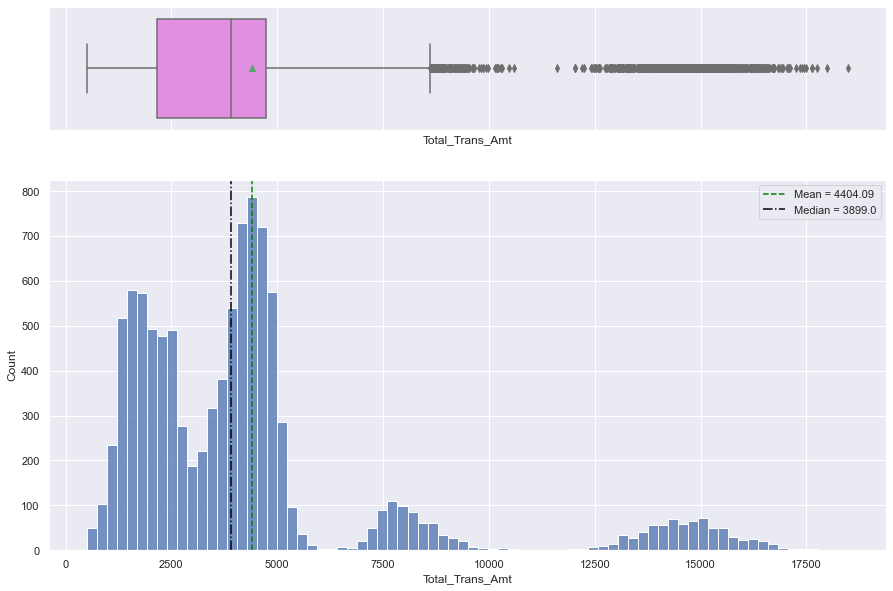

In [21]:
# Observations on Total_Trans_Amt
histogram_boxplot(data["Total_Trans_Amt"])

- There seems to be more than one distribution in `Total_Trans_Amt`.
- We will not treat the outliers since the outliers appear to be part of higher value modes.

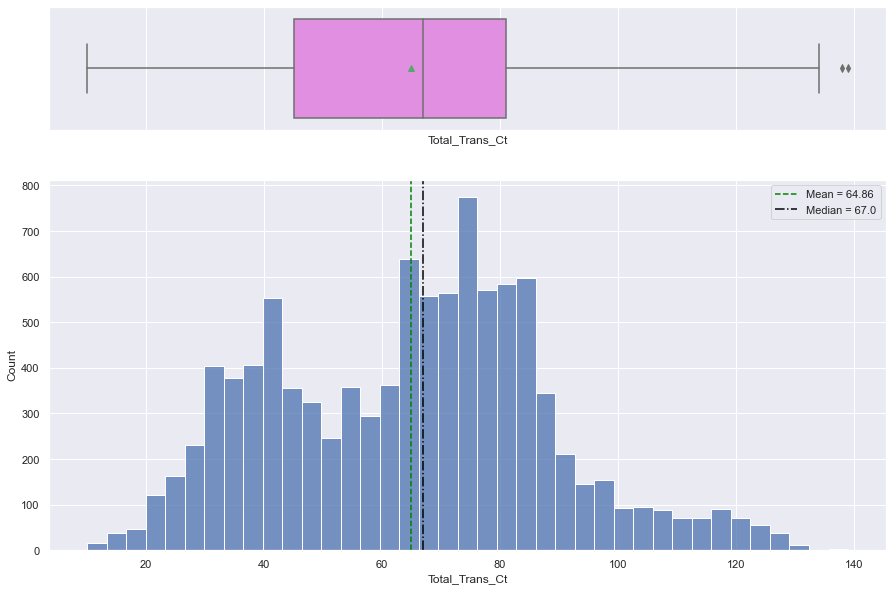

In [22]:
# Observations on Total_Trans_Ct
histogram_boxplot(data["Total_Trans_Ct"])

- The distribution is skewed somewhat towards the left indicating customers on average have more transactions than less.
- There are a few statistical outliers on the right i.e. a few customers made nearly 140 transactions during the last year.
    - We will not treat these outliers as they are part of the normal market trend.

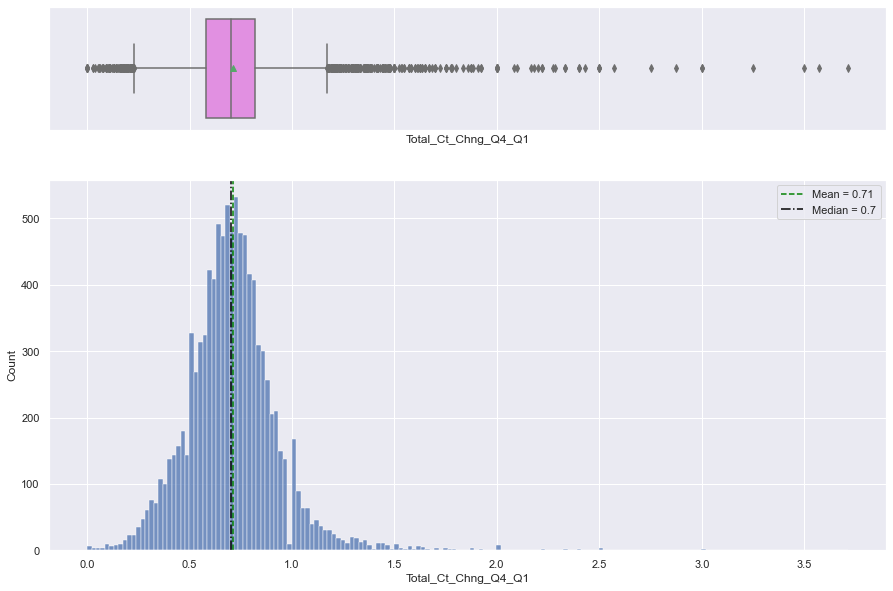

In [23]:
# Observations on Total_Ct_Chng_Q4_Q
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

- Similar to `Total_Amt_Chng_Q4_Q1`, this distribution is fairly symmetric except for a few extreme outliers on the right.
- The mean and median values are approximately equal.
- We can check on the most extreme outliers to see how they relate to our target variable.

In [24]:
# Printing the customers with the 10 highest Total_Ct_Chng_Q4_Q1
data.iloc[data["Total_Ct_Chng_Q4_Q1"].nlargest(10).index].sort_values(by="Total_Ct_Chng_Q4_Q1", ascending=False)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
1    Existing Customer            49      F                5        Graduate   
773  Existing Customer            61      M                0   Post-Graduate   
269  Existing Customer            54      M                5        Graduate   
12   Existing Customer            56      M                1         College   
113  Existing Customer            54      F                0      Uneducated   
190  Existing Customer            57      M                1        Graduate   
146  Existing Customer            41      F                2        Graduate   
366  Existing Customer            36      F                4        Graduate   
30   Existing Customer            53      M                3         Unknown   
4    Existing Customer            40      M                3      Uneducated   

    Marital_Status Income_Category Card_Category  Months_on_book  \
1           Single  Less than $40K          Blue              44   
773        Married         Unknown          Blue              53   
269        Married     $60K - $80K          Blue              38   
12          Single    $80K - $120K          Blue              36   
113        Married  Less than $40K          Blue              36   
190        Married    $80K - $120K          Blue              47   
146         Single  Less than $40K          Blue              32   
366        Married     $40K - $60K          Blue              36   
30         Married    $80K - $120K          Blue              33   
4          Married     $60K - $80K          Blue              21   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1                           6                       1                      2   
773                         6                       2                      3   
269                         3                       3                      3   
12                          3                       6                      0   
113                         2                       2                      2   
190                         5                       3                      1   
146                         6                       3                      2   
366                         6                       3                      3   
30                          3                       2                      3   
4                           5                       1                      0   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
1          8256.0                  864           7392.0                 1.541   
773       14434.0                 1927          12507.0                 2.594   
269        2290.0                 1434            856.0                 0.923   
12        11751.0                    0          11751.0                 2.594   
113        1494.0                  706            788.0                 1.674   
190       14612.0                 1976          12636.0                 1.768   
146        2250.0                 2117            133.0                 1.162   
366        1628.0                  969            659.0                 0.999   
30         2753.0                 1811            942.0                 0.977   
4          4716.0                    0           4716.0                 2.175   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
1               1291              33                3.714   
773             1731              32                3.571   
269             1119              18                3.500   
12              1539              17                3.250   
113             1305              24                3.000   
190             1827              24                3.000   
146             1617              31                2.875   
366             1893              15                2.750   
30              1038              25                2.57

Since all of the extreme right outliers have not left the bank, we will cap the `Total_Ct_Chng_Q4_Q1` to the lowest of the top 9 at a value of 2.571.

In [25]:
# Capping Total_Ct_Chng_Q4_Q1 variable
data["Total_Ct_Chng_Q4_Q1"].clip(upper=2.571, inplace=True)

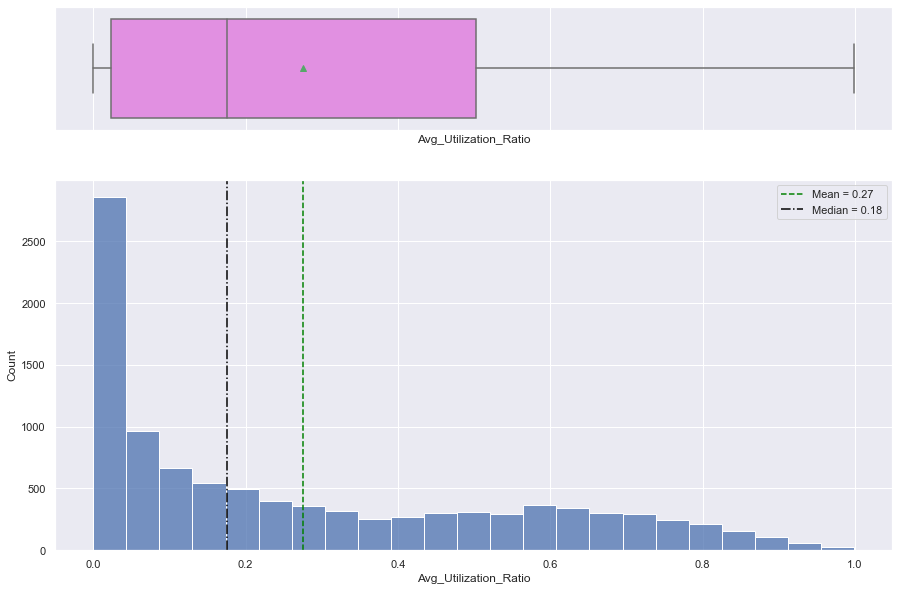

In [26]:
# Observations on Avg_Utilization_Ratio
histogram_boxplot(data["Avg_Utilization_Ratio"])

- According to the boxplot, there are no outliers.
- Approximately 25% of customers have an average utitlization ratio very near zero.
- The distribution is skewed towards the right.

**Let's look at the more categorical variables.**

In [27]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

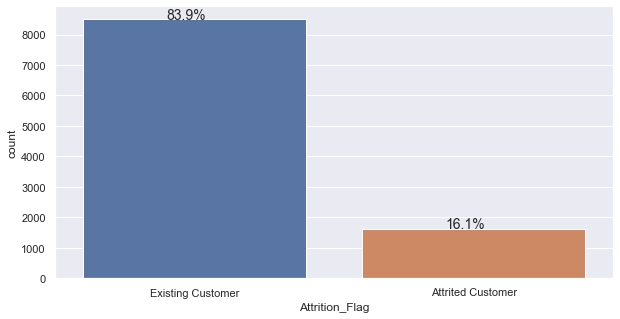

In [28]:
# Observations on Attrition_Flag
perc_on_bar(data["Attrition_Flag"])

- The dataset is highly weighted towards existing customers.
- We will most likely need to balance these two classes in some way.

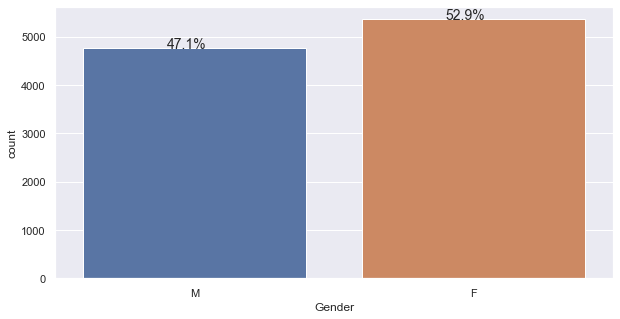

In [29]:
# Observations on Gender
perc_on_bar(data["Gender"])

- There are slighly more female than male customers in the dataset.

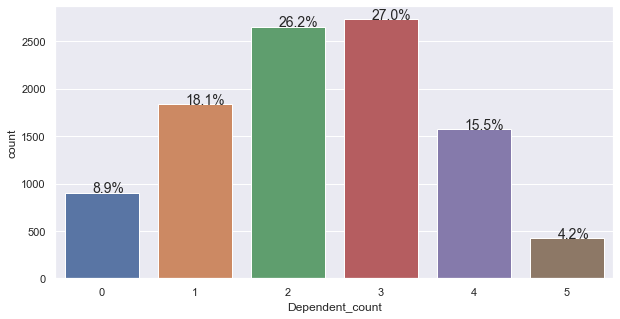

In [30]:
# Observations on Dependent_count
perc_on_bar(data["Dependent_count"])

- Most customers have two or three dependents.
- The distribution is roughly symmetric.

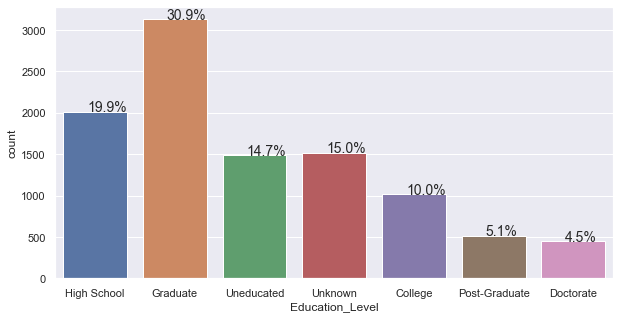

In [31]:
# Observations on Education_Level           
perc_on_bar(data["Education_Level"])

- Graduates make up the largest category of education with doctorates being the least, which fits with normal human distributions.
- The third largest category is "Unknown".  This may be due to a lack of requiring this data point for each customer.

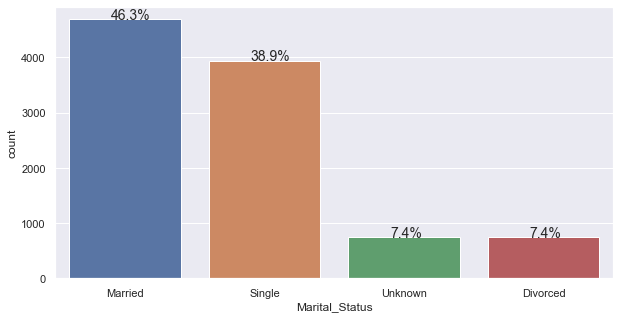

In [32]:
# Observations on Marital_Status
perc_on_bar(data["Marital_Status"])

- Almost half of customers are married, followed by nearly 40% being single.
- The "Unknown" category is tied for the third largest category.

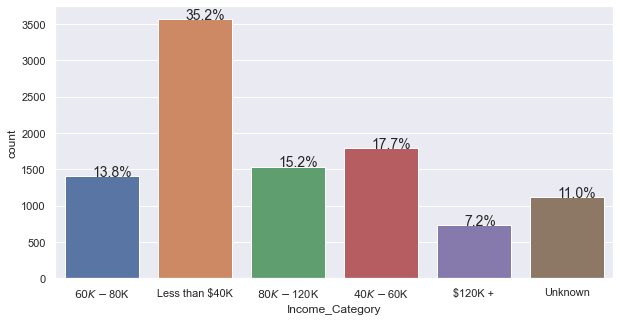

In [33]:
# Observations on Income_Category
perc_on_bar(data["Income_Category"])

- The largest income value is "Less than $\$40K$" i.e. the largest group of customers is in the smallest income bracket.
- As the income brackets increase in value, the percentage of the population decreases which fits with some typical income distributions.
- 11% of customers are in the "Unknown" category.

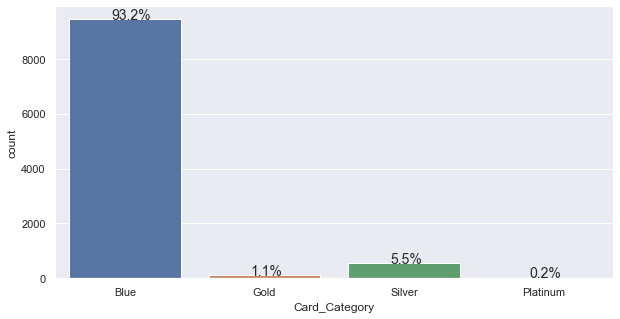

In [34]:
# Observations on Card_Category
perc_on_bar(data["Card_Category"])

- The vast majority of customers are in the Blue category.
- Only 5.5% are in Silver, 1.1% in Gold and 0.2% in Platinum.
- This may create problems with our model having enough data for the non-Blue classes.

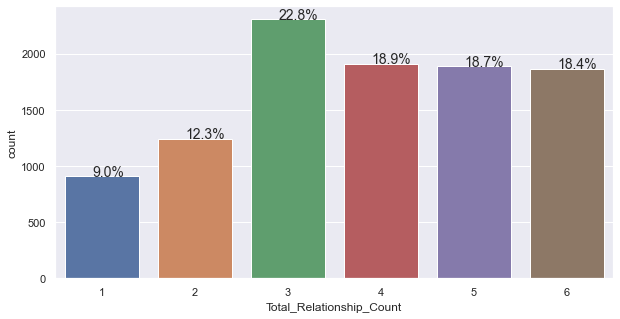

In [35]:
# Observations on Total_Relationship_Count
perc_on_bar(data["Total_Relationship_Count"])

- Most customers have three or more products with this bank with the most common being three products.

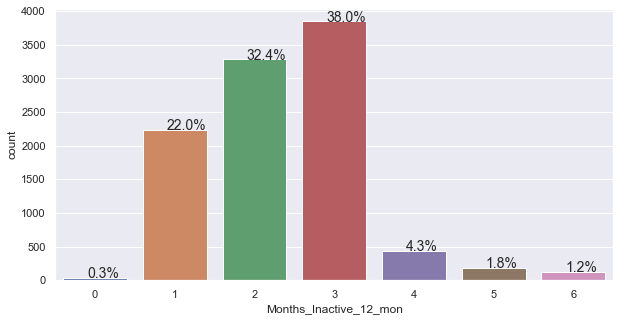

In [36]:
# Observations on Months_Inactive_12_mon
perc_on_bar(data["Months_Inactive_12_mon"])

- The vast majority of customers are inactive for one, two or three months.
- Very few (0.3%) customers are never inactive for a month.  The bank might want to think of ways to increase their clients' activity in some way.
- After peaking at three months of activity, the number of people inactive sharply drops off.
    - This hints there might be an event that happens around three months that pulls customers back in.

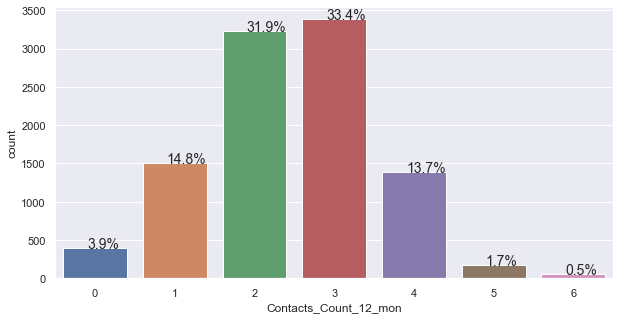

In [37]:
# Observations on Contacts_Count_12_mon
perc_on_bar(data["Contacts_Count_12_mon"])

- `Contacts_Count_12_mon` has a similar distribution to `Months_Inactive_12_mon`.
    - This might be due to the bank trying to contact customers once a month when they are inactive.
- These two graphs might suggest it takes up to 3 or 4 contacts to reengage the typical customer.

### Bivariate Analysis

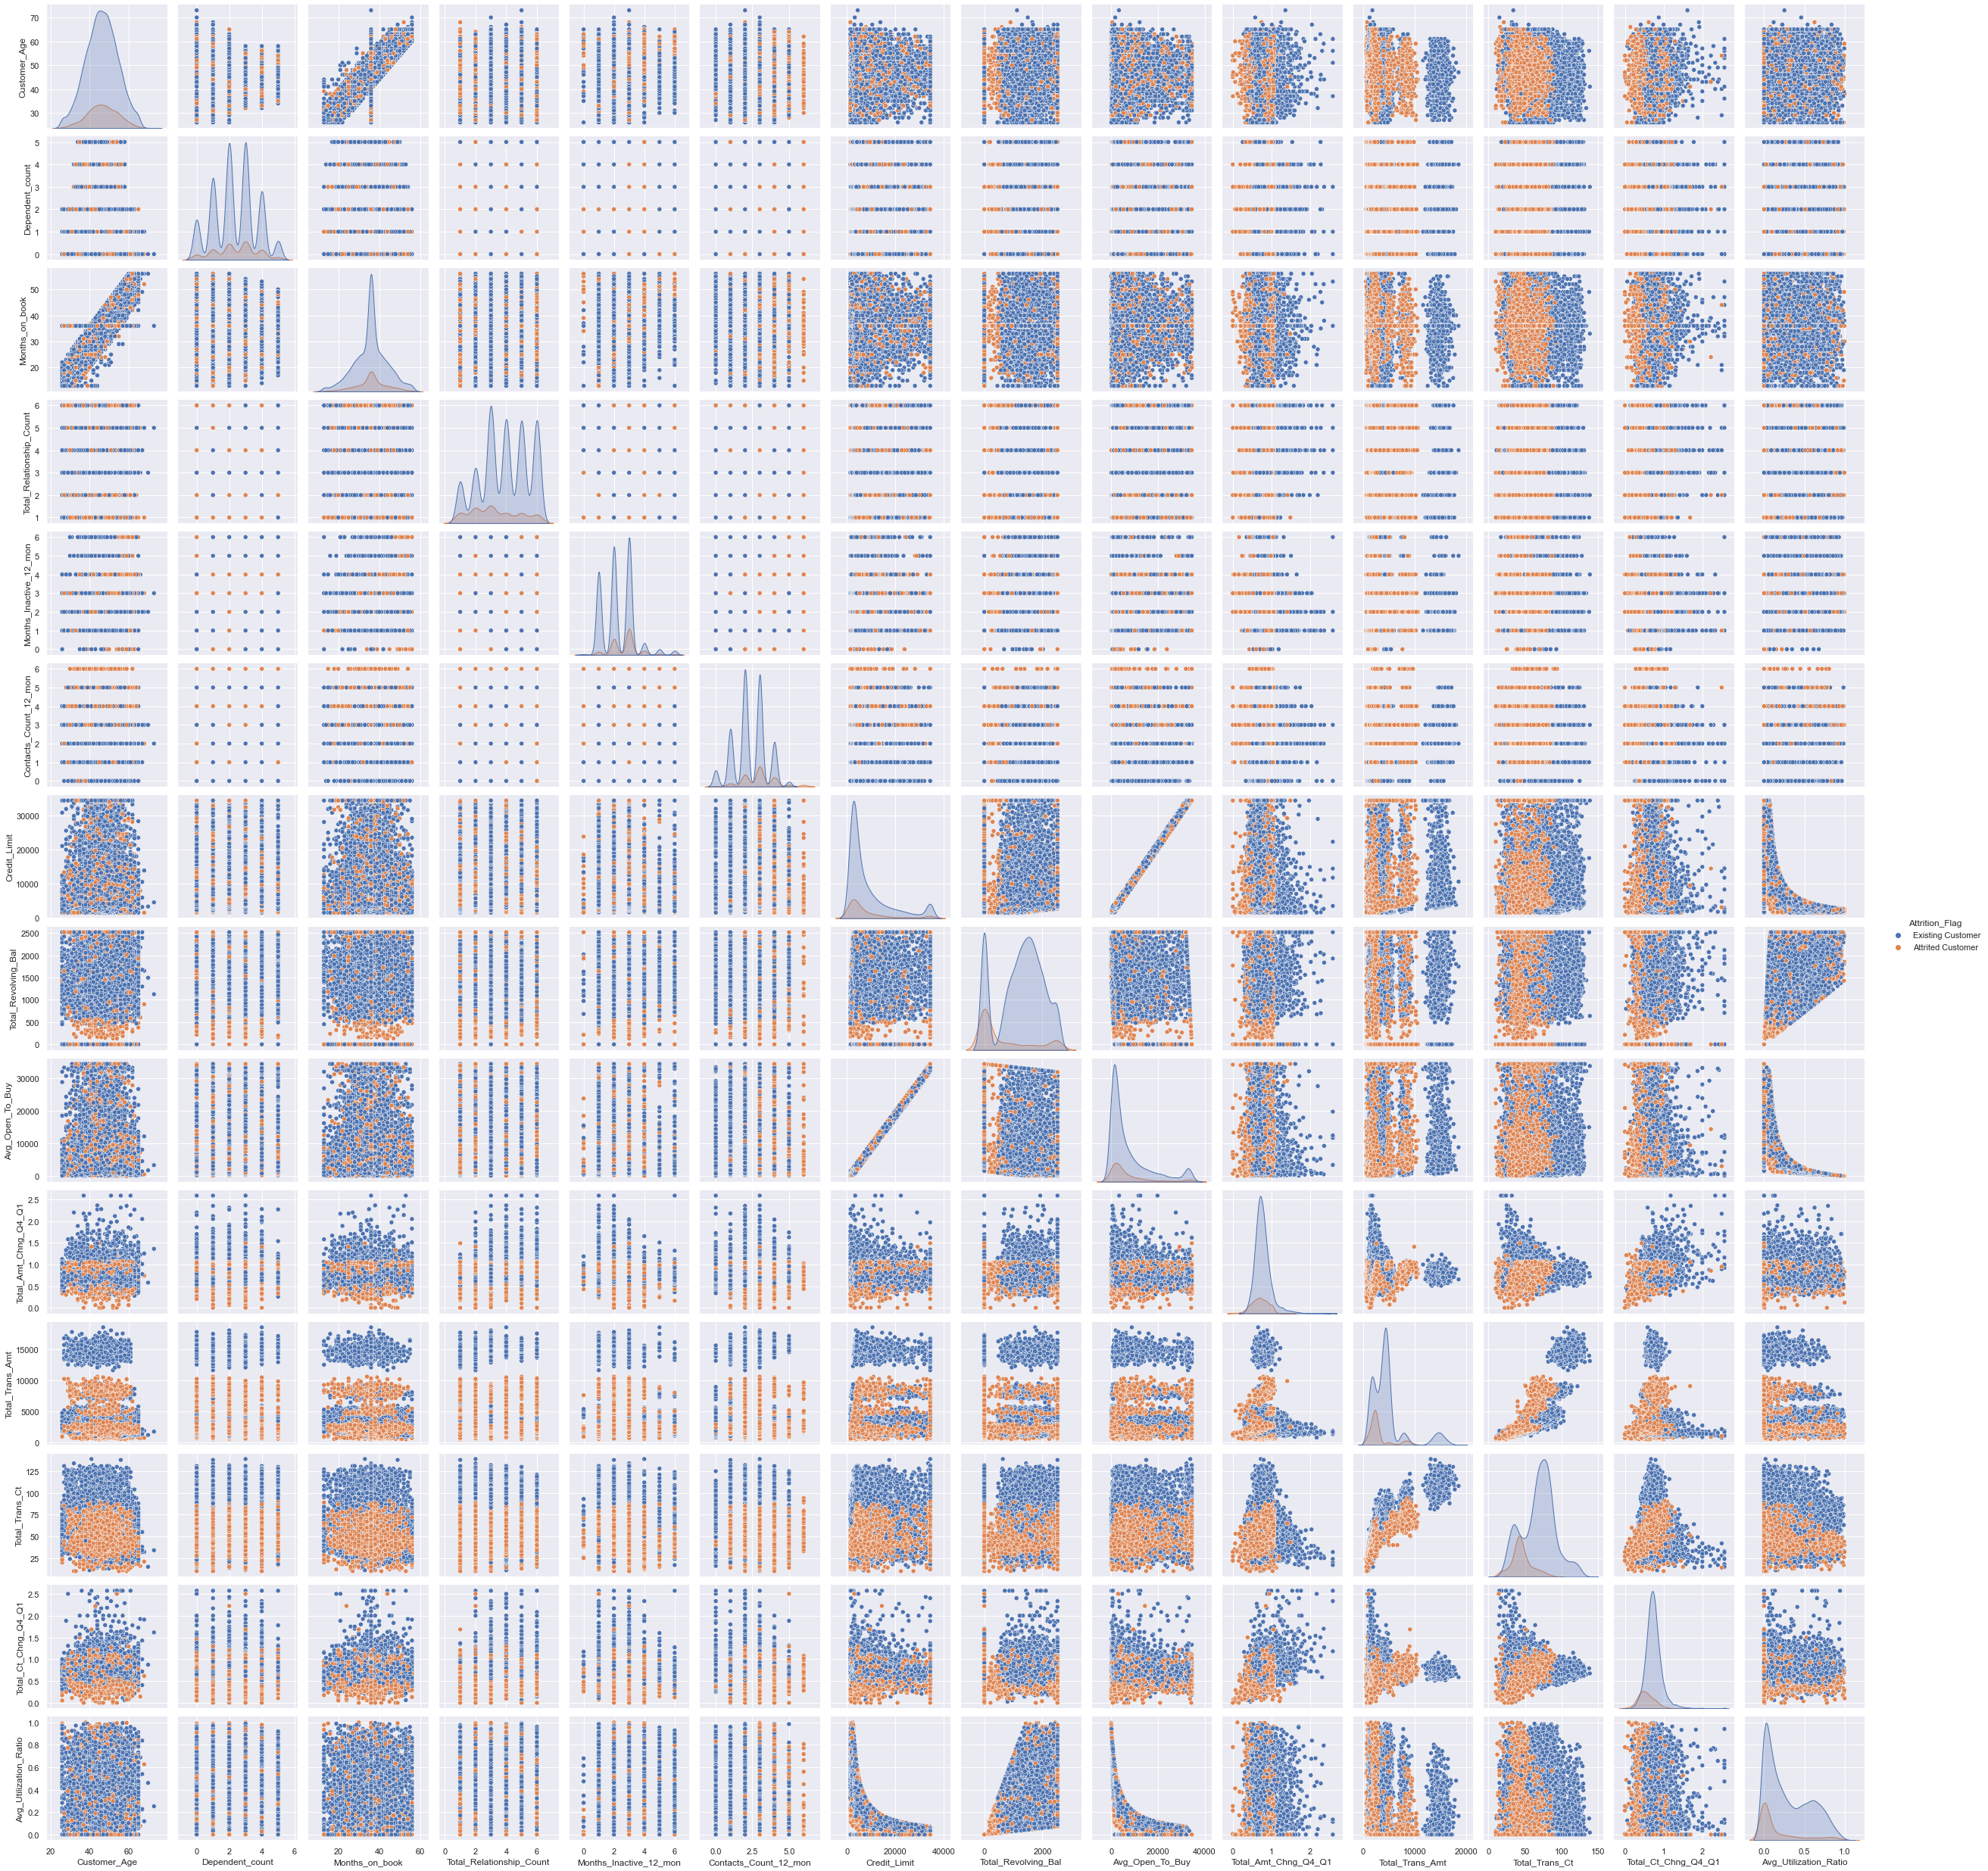

In [38]:
sns.pairplot(data=data, hue="Attrition_Flag");

- There are a few regions that seem to be nearly all attrition or not.  We will explore these more deeply on individual graphs.
    - It appears the vast majority of customers who have a `Total_Trans_Ct` above 100 (i.e. very active users) do not leave the bank.
    - `Contacts_Count_12_mon` shows most customers who have been contacted six times have left the bank.
    - Customers with a `Total_Transaction_Amt` above 12,000 (i.e. customers who really use the card) seem to stay with the bank.
- `Avg_Open_To_Buy` and `Credit_Limit` have a rather linear plot indicating they are highly correlated with one another.
- `Avg_Utilization_Ratio` seems to be a function of `Credit_Limit` and `Avg_Open_To_Buy`.
    - This makes sense because the utilization ratio is typically calculated using (1 - Open_To_Buy) divided by Credit_Limit

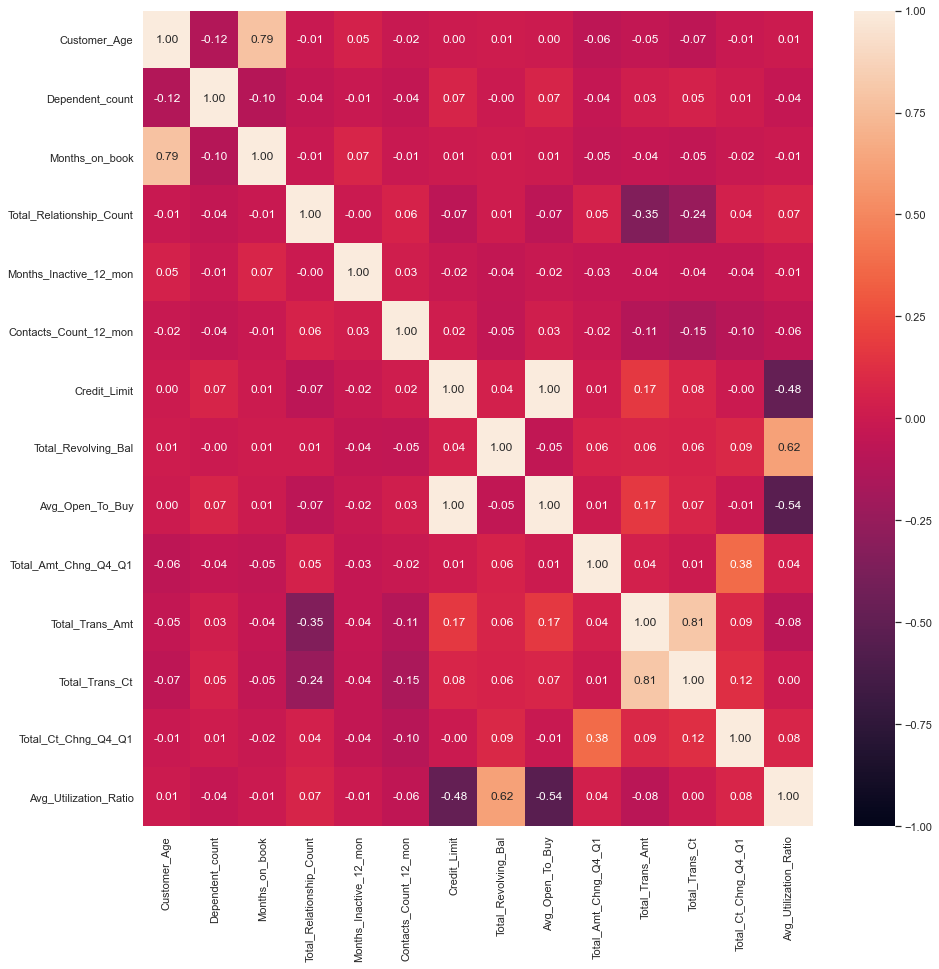

In [39]:
sns.set(rc={"figure.figsize": (15,15)})
sns.heatmap(data=data.corr(), annot=True, fmt="0.2f", vmax=1, vmin=-1);

- `Avg_Open_To_Buy` and `Credit_Limit` have a very high correlation value of 1.00.  We will be able to drop one of them since the other will tell us the same information.
- `Total_Trans_Ct` and `Total_Trans_Amt` have a correlation value of 0.81 which is high.  We will leave them both in for now to see how the model performs.
- `Months_on_book` and `Customer_Age` also have a high correlation value of 0.79.  We will leave them both in for now as well.
- There are no strongly negative correlated features.
    - The lowest correlation value is between `Avg_Open_To_Buy` and `Avg_Ultilization_Ratio`.  This makes sense because the more a customer uses their credit card, the less credit they will have available.

**Boxplots comparing continuous variables' distributions with respect to whether the customer left.**

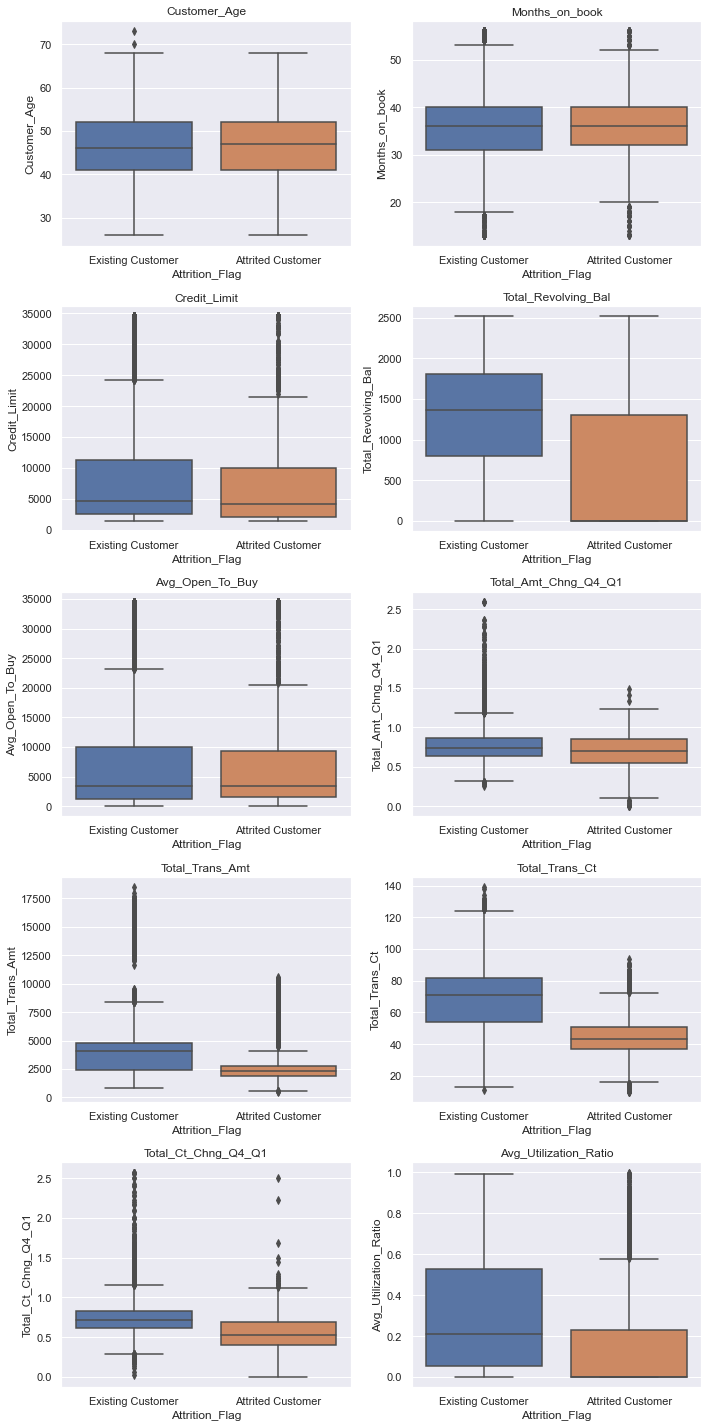

In [40]:
cols = [
        "Customer_Age",
        "Months_on_book",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Avg_Utilization_Ratio"
]

plt.figure(figsize=(10,20))

for i, variable in enumerate(cols):
    plt.subplot(5,2, i+1)
    sns.boxplot(x=data["Attrition_Flag"], y=data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- The top two plots show that attrition does not depend much on age or `Months_on_book`.
- The distribution of `Credit_Limit` is slightly lower for attrited customers versus existing ones.
- `Total_Revolving_Bal` shows attrited customers on average have a much lower revolving balance compared to existing customers.
- `Avg_Open_To_Buy` does not seem to affect customer attrition much.
- There are no existing customers in the dataset whose `Total_Amt_Chng_Q4_Q1` is above 1.5.
- Customers with a higher `Total_Trans_Amt` and `Total_Trans_Ct` are much more likely to stay as existing customers.
    - Above 12,000, virtually all customers, in the dataset are exisiting customers, i.e. customers who use the credit card a lot stay.
- Customer retention is positively affected by having a higher `Total_Ct_Chng_Q4_Q1` or a higher `Avg_Utilization_Ratio`.
    - This again shows customers who use the credit card more stay with the credit card.

**Stacked Barplots comparing continuous variables' distributions with respect to whether the customer left.**

In [41]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


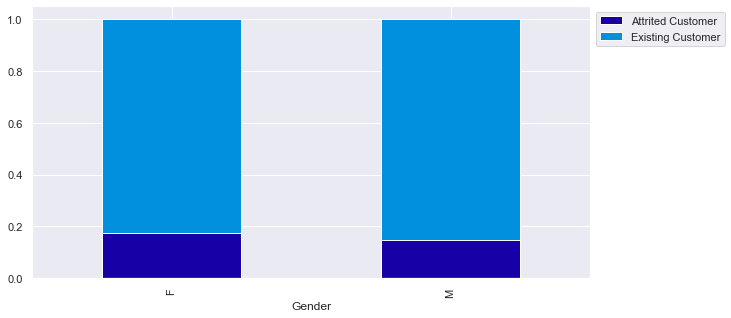

In [42]:
stacked_plot(data["Gender"])

- Female customers are slightly more likely to attrite.

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


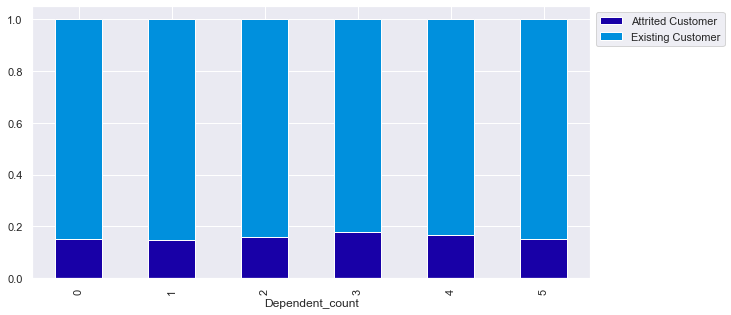

In [43]:
stacked_plot(data["Dependent_count"])

- There is not much differentiation between customers with different numbers of dependents.
- Customers with three dependents are slightly more likely to attrite than others.

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


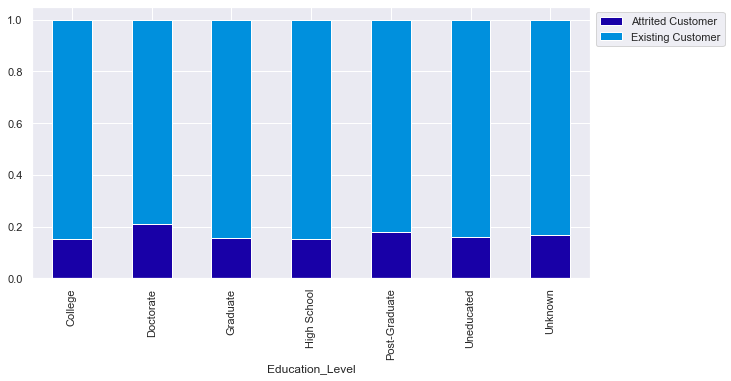

In [44]:
stacked_plot(data["Education_Level"])

- Customers who hold a doctorate are the most likely to attrite.
- Customers with high school eduction are near the least likely.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


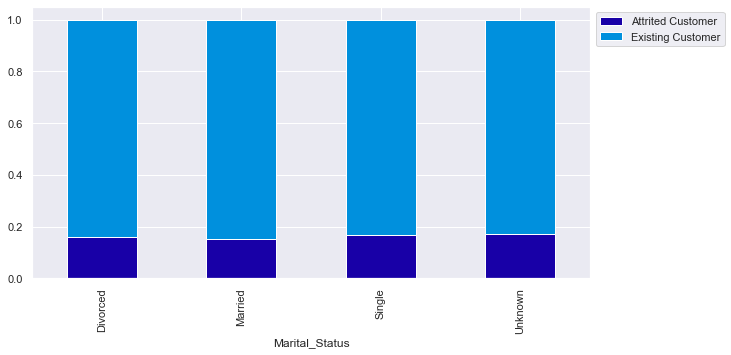

In [45]:
stacked_plot(data["Marital_Status"])

- Attrition does not depend much on marital status.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


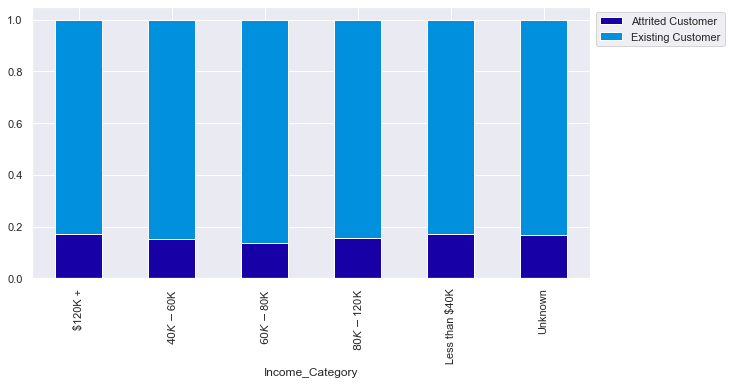

In [46]:
stacked_plot(data["Income_Category"])

- The highest and lowest income categories have the highest attrition rates.
- However, the differences in likelihood between all categories is not large.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


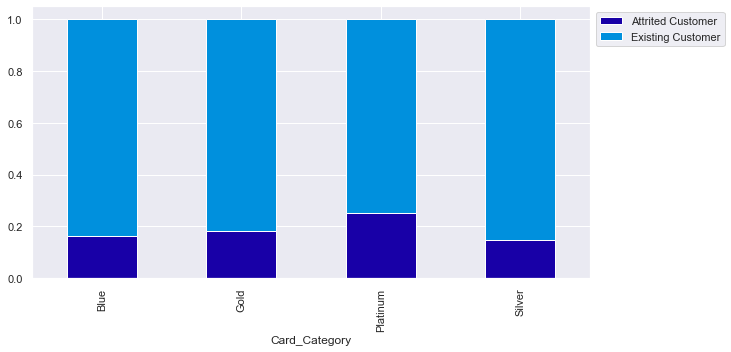

In [47]:
stacked_plot(data["Card_Category"])

- Platinum customers are the most likely group to attrite, while Silver is the least.
- Since nearly all customers hold the Blue card, it is good for the bank that they have the second lowest attrition rate.

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


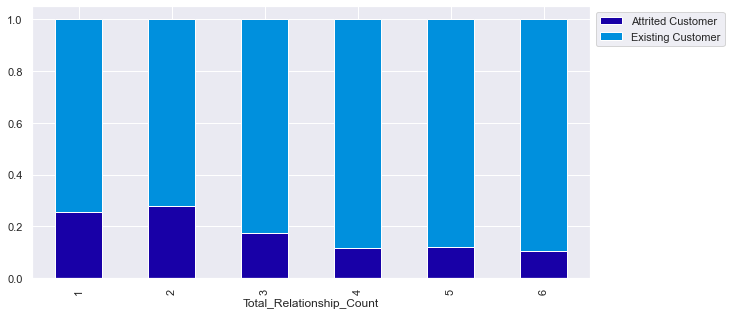

In [48]:
stacked_plot(data["Total_Relationship_Count"])

- Customers that have only one or two products with the bank are much more likely to attrite than customers who have more products.
    - This might be an example or by-product of brand loyalty.

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


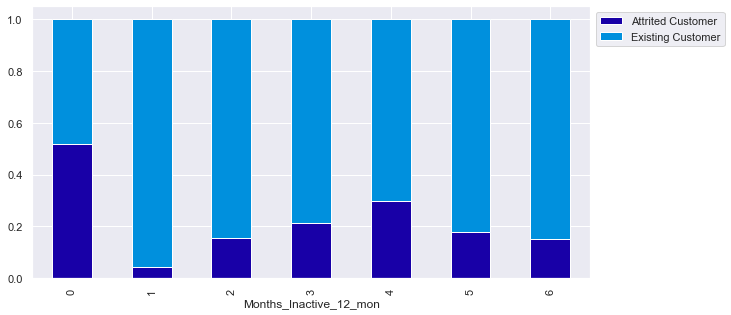

In [49]:
stacked_plot(data["Months_Inactive_12_mon"])

- Oddly, customers who have been inactive the least (i.e. zero months in the last year) are significantly more likely to attrite.
- For the other categories, there is a peak at four months and then it decays as you move above or below four months.
- Customers who were inactive only one month were the least likely to drop their card.

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


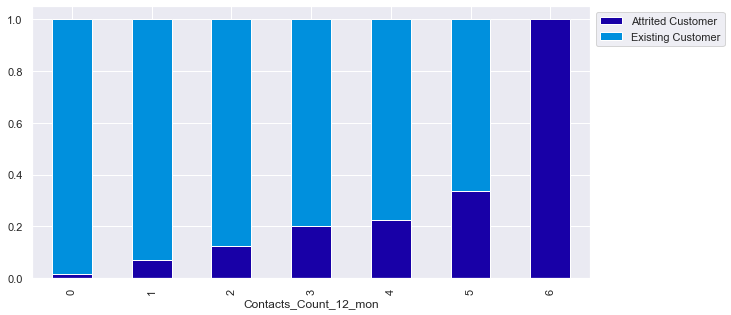

In [50]:
stacked_plot(data["Contacts_Count_12_mon"])

- Customers who had been contacted six times were virtually guaranteed to attrite.
- The more contacts the customer had the more likely there were to attrite.

## Data Preparation

As mentioned above, `Avg_Utilization_Ratio` is a function of other features in the dataset so we will drop it. `Avg_Open_To_Buy` and `Credit_Limit` have a correlation of 1.00 so we can drop either one of them.  We will choose to drop `Avg_Open_To_Buy`.

The models were run with and without dropping the above features.  The top model performance was increased by about six percent by dropping the above features.  Thus, this is the method shown below.

We will also drop `Attition_Flag` to form our independent variables' dataset.

In [51]:
x = data.drop(columns=["Attrition_Flag","Avg_Utilization_Ratio","Avg_Open_To_Buy"])

`Education_Level`, `Marital_Status` and `Income_Category` are the features with "Unknown" values.  We will convert their "Unknown" values to NaNs and all string (object) values to integers.  This will allow us to use the KNN Imputer.

In [52]:
# Grabbing the object columns that need to be mapped into integers for KNN imputation
objectCol = x.columns[x.dtypes=="object"]
objectCol

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [53]:
# Creating dictionary for mapping classes to integers
uniqueList = x["Gender"].unique()[x["Gender"].unique()!= "Unknown"]
genderMap = {uniqueList[i]: list(range(len(uniqueList)))[i] for i in range(len(uniqueList))}
genderMap

{'M': 0, 'F': 1}

In [54]:
# Creating dictionary for mapping classes to integers
uniqueList = x["Education_Level"].unique()[x["Education_Level"].unique()!= "Unknown"]
educationMap = {uniqueList[i]: list(range(len(uniqueList)))[i] for i in range(len(uniqueList))}
educationMap

{'High School': 0,
 'Graduate': 1,
 'Uneducated': 2,
 'College': 3,
 'Post-Graduate': 4,
 'Doctorate': 5}

In [55]:
# Creating dictionary for mapping classes to integers
uniqueList = x["Marital_Status"].unique()[x["Marital_Status"].unique()!= "Unknown"]
maritalMap = {uniqueList[i]: list(range(len(uniqueList)))[i] for i in range(len(uniqueList))}
maritalMap

{'Married': 0, 'Single': 1, 'Divorced': 2}

In [56]:
# Creating dictionary for mapping classes to integers
uniqueList = x["Income_Category"].unique()[x["Income_Category"].unique()!= "Unknown"]
incomeMap = {uniqueList[i]: list(range(len(uniqueList)))[i] for i in range(len(uniqueList))}
incomeMap

{'$60K - $80K': 0,
 'Less than $40K': 1,
 '$80K - $120K': 2,
 '$40K - $60K': 3,
 '$120K +': 4}

In [57]:
# Creating dictionary for mapping classes to integers
uniqueList = x["Card_Category"].unique()[x["Card_Category"].unique()!= "Unknown"]
cardMap = {uniqueList[i]: list(range(len(uniqueList)))[i] for i in range(len(uniqueList))}
cardMap

{'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3}

In [58]:
# Replacing all the "Unknown" categories with NaN values
x.replace(to_replace="Unknown", value=np.NaN, inplace=True)
x.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School            NaN   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  777                 1.335             1144              42   
1                  864                 1.541             1291              33   
2                    0                 2.594             1887              20   
3                 2517                 1.405             1171              20   
4                    0                 2.175              816              28   

   Total_Ct_Chng_Q4_Q1  
0                1.625  
1                2.571  
2                2.333  
3                2.333  
4                2.500

The above table shows we have replaced the "Unknown" values with NaNs.

In [59]:
# Showing there are now missing values in the 3 columns which had unknowns
x.isna().sum()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
dtype: int64

**Mapping the object values to integers**

In [60]:
x["Gender"] = x["Gender"].map(genderMap)
x["Education_Level"] = x["Education_Level"].map(educationMap)
x["Marital_Status"] = x["Marital_Status"].map(maritalMap)
x["Income_Category"] = x["Income_Category"].map(incomeMap)
x["Card_Category"] = x["Card_Category"].map(cardMap)
x.head()

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0            45       0                3              0.0             0.0   
1            49       1                5              1.0             1.0   
2            51       0                3              1.0             0.0   
3            40       1                4              0.0             NaN   
4            40       0                3              2.0             0.0   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0              0.0              0              39                         5   
1              1.0              0              44                         6   
2              2.0              0              36                         4   
3              1.0              0              34                         3   
4              0.0              0              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  777                 1.335             1144              42   
1                  864                 1.541             1291              33   
2                    0                 2.594             1887              20   
3                 2517                 1.405             1171              20   
4                    0                 2.175              816              28   

   Total_Ct_Chng_Q4_Q1  
0                1.625  
1                2.571  
2                2.333  
3                2.333  
4                2.500

**Changing the target variables from strings to integers.**
- We will change "Attrited Customer" to 1
- We will change "Existing Customer" to 0

In [61]:
y = data["Attrition_Flag"] # Storing the target column as the dependent variable y

y = pd.get_dummies(data=y) # Converting the two classes to integers

# Grabbing the values based off our definition that "Attrited Customer" = 1 and "Existing Customer" = 0
y = y["Attrited Customer"]
y.value_counts()

0    8500
1    1627
Name: Attrited Customer, dtype: int64

**Split the data into train and test sets**

In [62]:
# Splitting the data into training and testing sets
# Stratifying based on the target feature to maintian equal percentages of Attrited in the training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

print(x_train.shape, x_test.shape)

(7088, 17) (3039, 17)


In [63]:
y_train.value_counts(normalize=True)

0    0.839306
1    0.160694
Name: Attrited Customer, dtype: float64

In [64]:
y_test.value_counts(normalize=True)

0    0.839421
1    0.160579
Name: Attrited Customer, dtype: float64

The above two outputs show both the training and testing sets have the same percentage of attrited and existing customers.

In [65]:
# Reseting the indices so they match the indices of x_train after we use the KNN imputer
y_train.reset_index(drop=True, inplace=True)

In [66]:
# Reseting the indices so they match the indices of x_test after we use the KNN imputer
y_test.reset_index(drop=True, inplace=True)

### Missing-Value Treatment
- We will use KNN imputer to impute the "Unknown" values.
- `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest found in the training set.
    - KNN imputer replaces missing values using the average of k nearest non-missing feature values.
    - Nearest points are found based on euclidean distance.


The models were run with and without imputing the unknown values.  It was found that imputing the values had a slightly better performance than not imputing the unknown values.  Thus, this is the method shown below.

In [67]:
imputer = KNNImputer(n_neighbors=5)

In [68]:
# Fit and transform the train data
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

# Transform the test data
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

In [69]:
# Checking that no colunm has missing values in train or test sets
print(x_train.isna().sum())
print("-"*30)
print(x_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt           

All missing values have been treated.


**Let's inverse map the encoded values.**

In [70]:
# Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    x_train[y] = np.round(x_train[y]).map(inv_dict).astype("category")
    x_test[y] = np.round(x_test[y]).map(inv_dict).astype("category")

In [71]:
inverse_mapping(genderMap, "Gender")
inverse_mapping(educationMap, "Education_Level")
inverse_mapping(maritalMap, "Marital_Status")
inverse_mapping(incomeMap, "Income_Category")
inverse_mapping(cardMap, "Card_Category")

In [72]:
for col in objectCol:
    print(x_train[col].value_counts())
    print("*"*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         2659
Uneducated       1500
High School      1460
College           789
Post-Graduate     368
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3500
Single      3086
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2819
$80K - $120K      1455
$40K - $60K       1321
$60K - $80K        983
$120K +            510
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


The inverse mapping has restored our original class values.

### Creating Dummy Variables
We will create dummy variables for each feature that includes strings (words) as values.

In [73]:
# Creating dummy variables droping one of the values as it is not needed for each feature
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
print(x_train.shape, x_test.shape)

(7088, 27) (3039, 27)


In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    7088 non-null   float64
 1   Dependent_count                 7088 non-null   float64
 2   Months_on_book                  7088 non-null   float64
 3   Total_Relationship_Count        7088 non-null   float64
 4   Months_Inactive_12_mon          7088 non-null   float64
 5   Contacts_Count_12_mon           7088 non-null   float64
 6   Credit_Limit                    7088 non-null   float64
 7   Total_Revolving_Bal             7088 non-null   float64
 8   Total_Amt_Chng_Q4_Q1            7088 non-null   float64
 9   Total_Trans_Amt                 7088 non-null   float64
 10  Total_Trans_Ct                  7088 non-null   float64
 11  Total_Ct_Chng_Q4_Q1             7088 non-null   float64
 12  Gender_M                        70

## Building the Model

### Model evaluation criterion:

#### The model can make wrong predictions as:
1. Predicting a customer will attrite but does not - Loss of resources
2. Predicting a customer will **not** attrite but eventually does - Loss of opportunity

#### Which case is more important? 
* Predicting that customers will not attrite but eventually do i.e. losing out on a potential source of income for the company because that customer will not be targeted by the bank when they should have been.

#### How to reduce this loss?  We need to reduce false negatives
* Company wants Recall to be maximized, the greater the Recall the lesser the chance of false negatives.

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV.**

- `Stratified K-Folds cross-validator` provides dataset indices to split data into train/validation sets. This splits the dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as a validation set while the k - 1 remaining folds form the training set.

In [75]:
baseModels = [] # Empty list to store all of the untuned models in

# Appending pipeplines for each untuned model into the list

# Logistic Regression Untuned Model
baseModels.append(
    ("LR", Pipeline(steps=[("scaler", StandardScaler()), ("log_reg", LogisticRegression(random_state=1))]))
)

# Random Forest Untuned Model
baseModels.append(
    ("RF", Pipeline(steps=[("scaler", StandardScaler()), ("random_forest", RandomForestClassifier(random_state=1))]))
)

# Gradient Boosting Untuned Model
baseModels.append(
    ("GBM", Pipeline(steps=[("scaler", StandardScaler()), ("gradient_boosting", GradientBoostingClassifier(random_state=1))]))
)

# AdaBoost Untuned Model
baseModels.append(
    ("ADB", Pipeline(steps=[("scaler", StandardScaler()), ("adaboost", AdaBoostClassifier(random_state=1))]))
)

# XGBoost Untuned Model
baseModels.append(
    ("XGB", Pipeline(steps=[("scaler", StandardScaler()), ("xgboost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric="logloss"))]))
)

# Decision Tree Untuned Model
baseModels.append(
    ("DTREE", Pipeline(steps=[("scaler", StandardScaler()), ("decision_tree", DecisionTreeClassifier(random_state=1))]))
)

In [76]:
# Empty list for storing the results from the untuned models
untunedResults = []

In [77]:
# Looping through all untuned models to get the mean cross validation score for each
for name, model in baseModels:
    scoring = "recall" # As noted above, we are trying to maximize recall
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) # Setting number of splits equal to 5
    
    # Running the cross validation training for the current model and storing the results
    cv_result = cross_val_score(estimator=model, X=x_train, y=y_train, scoring=scoring, cv=kfold)
    untunedResults.append([name, cv_result])

In [78]:
# Displaying the average results from the crossvalidation training
avgCV = pd.DataFrame(untunedResults, columns=["Model", "Mean Recall Score"])
avgCV["Std Dev"] = avgCV["Mean Recall Score"].apply(lambda x: x.std())
avgCV["Mean Recall Score"] = avgCV["Mean Recall Score"].apply(lambda x: x.mean())
avgCV.sort_values(by="Mean Recall Score", ascending=False)

Model  Mean Recall Score   Std Dev
4    XGB           0.864781  0.028544
3    ADB           0.835814  0.034965
2    GBM           0.833167  0.031501
1     RF           0.792789  0.034203
5  DTREE           0.783140  0.047055
0     LR           0.590900  0.054030

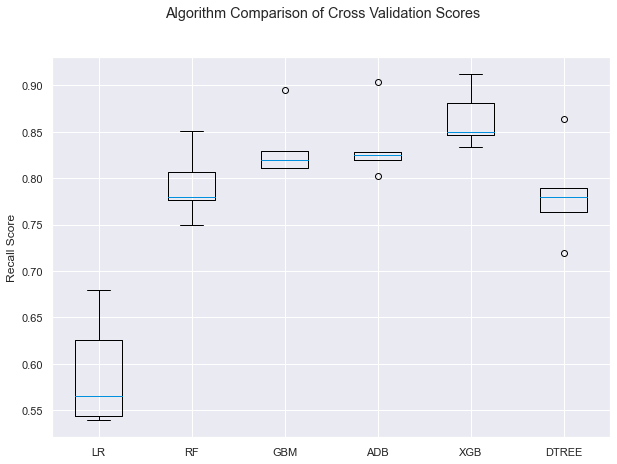

In [79]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10,7))

fig.suptitle("Algorithm Comparison of Cross Validation Scores") # Setting the title
ax = fig.add_subplot(111) # Setting up a single graph

# Transforming untunedResults into a dataframe
untunedResults = pd.DataFrame(data=untunedResults, columns=["Name","Recall"])

plt.boxplot(untunedResults["Recall"]) # Plotting a boxplot of the different CV scores
ax.set_xticklabels(untunedResults["Name"]) # Setting the x-axis labels to be the model names
ax.set_ylabel("Recall Score") # Setting the y-axis label to recall score


plt.show()

- We can see that XGBoost is giving the highest cross validated recall score.
- Gradient Boosting and AdaBoost are giving high recall scores as well.
- We will tune all the models to see which ends up performing the best.

**First, let's create two functions to calculate different metrics and a confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [80]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(x_train, y_train))
        print("Accuracy on test set : ", model.score(x_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [81]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

Before we use GridSearchCV and RandomizedSearchCV on the decision tree classifiers, we will first use up and down sampling to try to improve our Logistic Regression model.

### Base Logistic Regression Model

In [82]:
# Making the pipeline
lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))
lr.fit(X=x_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

Accuracy on training set :  0.906461625282167
Accuracy on test set :  0.9035867061533399
Recall on training set :  0.591747146619842
Recall on test set :  0.5778688524590164
Precision on training set :  0.7729357798165137
Precision on test set :  0.7642276422764228


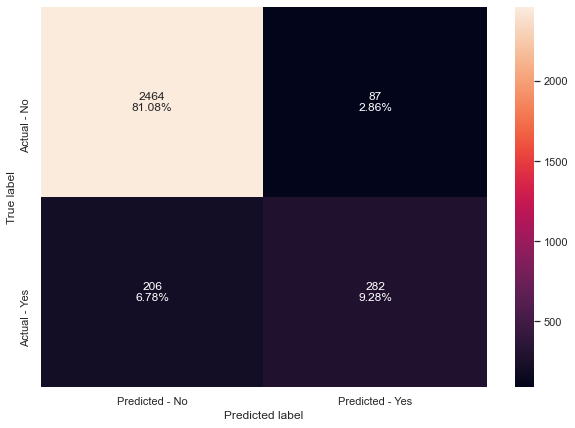

In [83]:
# Calculating different metrics
get_metrics_score(lr)

# Creating confusion matrix
make_confusion_matrix(lr, y_test)

- The base logistic regression model is not overfitting the training data.
- Unfortunately, we care most about recall which is the lowest score.  Let's try to improve it with upsampling and downsampling.

### SMOTE to Upsample Attrited_Customers (the smaller class)
SMOTE creates new, synthetic data points from the original data.

In [84]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 1139
Before UpSampling, counts of label '0': 5949 

After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 5949 

After UpSampling, the shape of train_X: (11898, 27)
After UpSampling, the shape of train_y: (11898,) 



In [85]:
# Making the pipeline
lrSmote = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))
lrSmote.fit(X=x_train_res, y=y_train_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

Accuracy on training set :  0.8843115124153499
Accuracy on test set :  0.8821980914774596
Recall on training set :  0.6769095697980685
Recall on test set :  0.6987704918032787
Precision on training set :  0.6304170073589533
Precision on test set :  0.6177536231884058


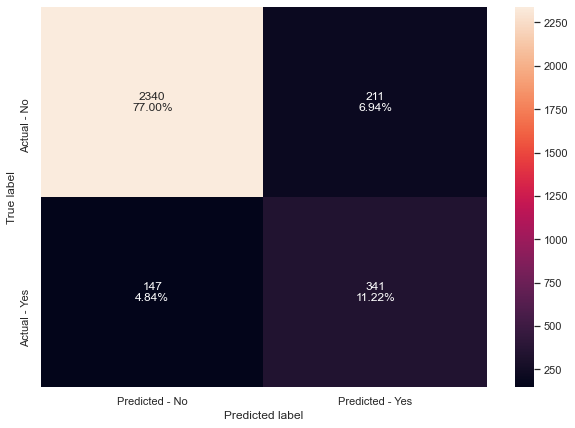

In [86]:
# Calculating different metrics
get_metrics_score(lrSmote)

# Creating confusion matrix
make_confusion_matrix(lrSmote, y_test)

- Upsampling the smaller class has helped the model identify it better as seen from a higher Recall score.
- This model is generalized but still is not performing very well.

### Random Downsampling the Larger Class (existing_customers)
Random downsampling will create more balanced target classes, however we can lose vital information in the process.

In [87]:
existingCustomerIndices = x_train[y_train == 0].index # Getting the row numbers for the Existing Customers
numberExisting = len(existingCustomerIndices) # How many Existing customers are in the training data
print("Number of Existing Customers:", numberExisting)

attritedCustomerIndices = x_train[y_train == 1].index # Getting the row numbers for the Attrited Customers
numberAttrited = len(attritedCustomerIndices) # How many Attrited customers are in the training data
print("Number of Attrited Customers:", numberAttrited)

print("Difference in Class Counts:", numberExisting-numberAttrited)

Number of Existing Customers: 5949
Number of Attrited Customers: 1139
Difference in Class Counts: 4810


Since there are 4810 more Existing Customers in the dataset than Attrited Customers, we will trim the number of Existing Customers.  If we trim 4800, the counts for both classes will be close to equal.  The more we trim the more information we may be losing.

In [88]:
# Randomly picking 1149 Existing Customers
randomIndices = np.random.choice(a=existingCustomerIndices, size=numberExisting-4800, replace=False)

In [89]:
# Combining the randomly selected Existing Customer indices with those of the Attrited customers
downSampleIndices = np.concatenate([randomIndices, attritedCustomerIndices])

In [90]:
# Creating the new training samples with just the downsampling we want
x_train_down_sample = x_train.loc[downSampleIndices]
y_train_down_sample = y_train.loc[downSampleIndices]

In [91]:
# Showing the downsampling worked
y_train_down_sample.value_counts()

0    1149
1    1139
Name: Attrited Customer, dtype: int64

We now have nearly balanced classes to train on.  The downsampling worked.

In [92]:
# Making the pipeline
lrDown = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))
lrDown.fit(X=x_train_down_sample, y=y_train_down_sample)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

Accuracy on training set :  0.8479119638826185
Accuracy on test set :  0.8407370845672919
Recall on training set :  0.8551360842844601
Recall on test set :  0.8647540983606558
Precision on training set :  0.516163222045575
Precision on test set :  0.5023809523809524


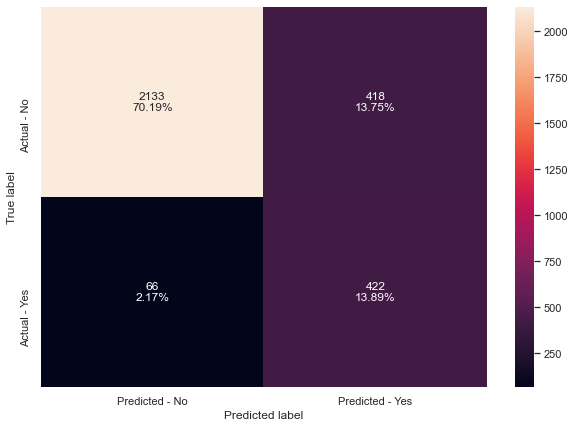

In [93]:
# Calculating different metrics
get_metrics_score(lrDown)

# Creating confusion matrix
make_confusion_matrix(lrDown, y_test)

- The random downsampling greatly improved our recall score.  The model is also generalized and not overfitting.

### Random Downsampling the Larger Class (existing_customers)
We will use a built-in library now to do the downsampling.

In [94]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

rus = RandomUnderSampler(random_state=1)   #Random under sampling
x_train_rus, y_train_rus = rus.fit_resample(X=x_train, y=y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_train_rus==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_rus==0)))



print('After UpSampling, the shape of train_X: {}'.format(x_train_rus.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_rus.shape))

Before UpSampling, counts of label '1': 1139
Before UpSampling, counts of label '0': 5949 

After UpSampling, counts of label '1': 1139
After UpSampling, counts of label '0': 1139 

After UpSampling, the shape of train_X: (2278, 27)
After UpSampling, the shape of train_y: (2278,) 



In [95]:
# Making the pipeline
lrRandomDown = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))
lrRandomDown.fit(X=x_train_down_sample, y=y_train_down_sample)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

Accuracy on training set :  0.8479119638826185
Accuracy on test set :  0.8407370845672919
Recall on training set :  0.8551360842844601
Recall on test set :  0.8647540983606558
Precision on training set :  0.516163222045575
Precision on test set :  0.5023809523809524


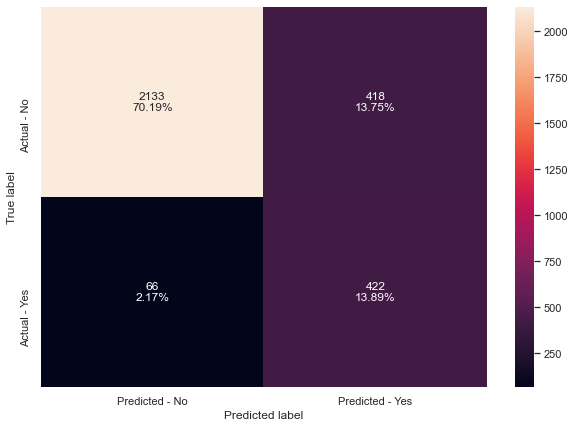

In [96]:
# Calculating different metrics
get_metrics_score(lrRandomDown)

# Creating confusion matrix
make_confusion_matrix(lrRandomDown, y_test)

- Using the built-in library is giving nearly the same results as our custom function.

## Logistic Regression Summary

While upsampling and downsampling both improved our logistic regression model, downsampling gave us the best performance on recall.  In all the Logistic Regression models overtraining was not an issue.  Now let us use hyperparameter tuning to improve our decision tree based models.

## Hyperparameter Tuning

We will use pipelines with StandardScaler and tune the model using GridSearchCV and RandomizedSearchCV.  We will also compare the performance and time taken by these two methods - grid search and randomized search.

We can also use make_pipeline function instead of Pipeline to create a pipeline.

`make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.

## Decision Tree

### GridSearchCV

In [97]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, 8, 10, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15],
    "decisiontreeclassifier__class_weight": ["balanced", None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearch CV
grid_cv.fit(X=x_train, y=y_train)

print(
    "Best Parameters:{} \n Recall Score: {}".format(grid_cv.best_params_, grid_cv.best_score_)


Best Parameters:{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_split': 2} 
 Recall Score: 0.9007767215395317
Wall time: 8.61 s


In [98]:
# Creating new pipeline with best parameters
dtree_tuned1 = grid_cv.best_estimator_

# Fit the model on training data
dtree_tuned1.fit(X=x_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=4,
                                        random_state=1))])

Accuracy on training set :  0.8752821670428894
Accuracy on test set :  0.8591641987495887
Recall on training set :  0.913081650570676
Recall on test set :  0.8934426229508197
Precision on training set :  0.5698630136986301
Precision on test set :  0.5369458128078818


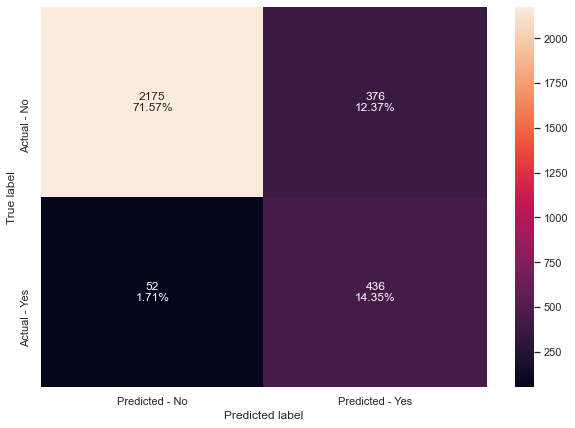

In [99]:
# Calculating different metrics
get_metrics_score(dtree_tuned1)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

- The testing recall score has improved by about 11% over the cross validated recall score of the untuned tree.
- The tuned model is not really overfitting the training data and is performing relatively well.
- The model found that balancing the target classes performed best. This makes sense because our target feature classes are very unbalanced.

### RandomizedSearchCV

In [100]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, 8, 10, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15],
    "decisiontreeclassifier__class_weight": ["balanced", None]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=40, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__class_weight': 'balanced'} with CV score=0.9007767215395317:
Wall time: 1.99 s


In [101]:
# Creating new pipeline with best parameters
dtree_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
dtree_tuned2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=4,
                                        random_state=1))])

Accuracy on training set :  0.8752821670428894
Accuracy on test set :  0.8591641987495887
Recall on training set :  0.913081650570676
Recall on test set :  0.8934426229508197
Precision on training set :  0.5698630136986301
Precision on test set :  0.5369458128078818


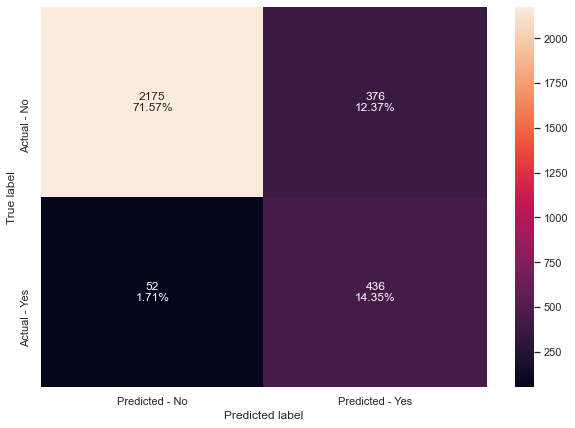

In [102]:
# Calculating different metrics
get_metrics_score(dtree_tuned2)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

- The randomized search decision tree found the exact same solution as the GridSearchCV.
- However, by limiting the number of permutations it could try to 40, RandomizedSearchCV found it in about a fourth of the time.
    - From 9.46 seconds down to 2.11 seconds.

## Random Forest

### GridSearchCV

In [103]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
              "randomforestclassifier__max_features": ['sqrt', 'log2', 'auto'],
              "randomforestclassifier__min_samples_leaf": np.arange(1,15,5),
              "randomforestclassifier__min_samples_split": np.arange(2,20,5),
              "randomforestclassifier__n_estimators": list(np.linspace(10,50,10,dtype="int")),
              "randomforestclassifier__class_weight": ["balanced", None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearch CV
grid_cv.fit(X=x_train, y=y_train)

print(
    "Best Parameters:{} \n Recall Score: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 11, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 23} 
 Recall Score: 0.8964100780585825
Wall time: 2min 32s


In [104]:
# Creating new pipeline with best parameters
rf_tuned1 = grid_cv.best_estimator_

# Fit the model on training data
rf_tuned1.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features='sqrt',
                                        min_samples_leaf=11, n_estimators=23,
                                        random_state=1))])

Accuracy on training set :  0.9593679458239278
Accuracy on test set :  0.9397828232971372
Recall on training set :  0.9719051799824407
Recall on test set :  0.9057377049180327
Precision on training set :  0.8121790168745414
Precision on test set :  0.7633851468048359


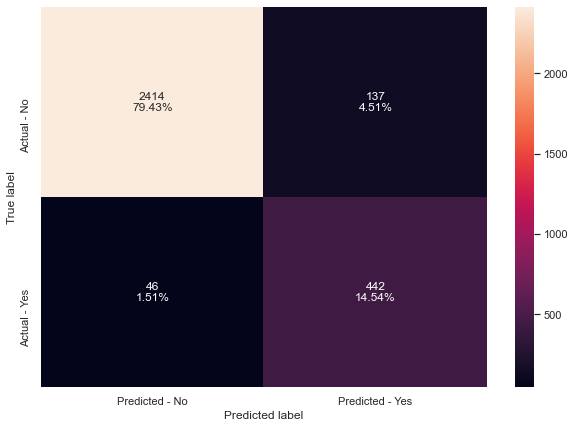

In [105]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

- The tuned Random Forest has improved the test recall by 11% from the untuned cross validation recall score of ~79%.
- This model is overfitting the training data however.

### RandomizedSearchCV

In [106]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
              "randomforestclassifier__max_features": ['sqrt', 'log2', 'auto'],
              "randomforestclassifier__min_samples_leaf": np.arange(1,15,5),
              "randomforestclassifier__min_samples_split": np.arange(2,20,5),
              "randomforestclassifier__n_estimators": list(np.linspace(10,50,10,dtype="int")),
              "randomforestclassifier__class_weight": ["balanced", None]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=40, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 14, 'randomforestclassifier__min_samples_split': 12, 'randomforestclassifier__min_samples_leaf': 11, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__class_weight': 'balanced'} with CV score=0.8867532266790323:
Wall time: 8.78 s


In [107]:
# Creating new pipeline with best parameters
rf_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
rf_tuned2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features='sqrt',
                                        min_samples_leaf=11,
                                        min_samples_split=12, n_estimators=14,
                                        random_state=1))])

Accuracy on training set :  0.9562641083521445
Accuracy on test set :  0.9420862125699243
Recall on training set :  0.9719051799824407
Recall on test set :  0.9262295081967213
Precision on training set :  0.7992779783393502
Precision on test set :  0.7635135135135135


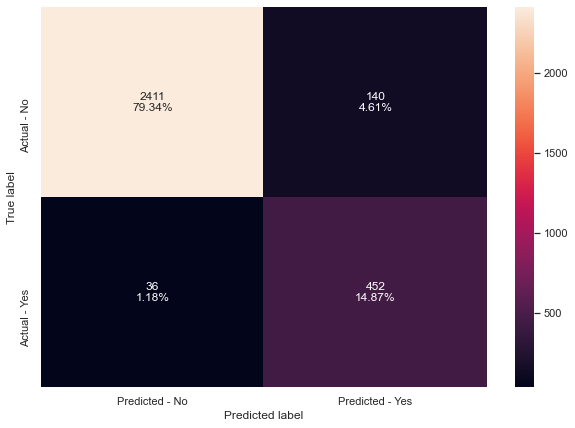

In [108]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

- Randomized search is giving somewhat better performance compared to the grid search.
    - The model is performing reasonably well on recall but is overfitting the training data.
- The time to find nearly the same performance dropped from 2 min 45 s down to 9.51 s.

## AdaBoost

### GridSearchCV

In [109]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1, class_weight="balanced"),
        DecisionTreeClassifier(max_depth=2, random_state=1, class_weight="balanced"),
        DecisionTreeClassifier(max_depth=3, random_state=1, class_weight="balanced"),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X=x_train, y=y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__n_estimators': 60} 
Score: 0.9429438132776877
Wall time: 1min 47s


In [110]:
# Creating new pipeline with best parameters
abc_tuned1 = grid_cv.best_estimator_

# Fit the model on training data
abc_tuned1.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                          max_depth=2,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=60,
                                    random_state=1))])

Accuracy on training set :  0.9538656884875847
Accuracy on test set :  0.945705824284304
Recall on training set :  0.9692712906057945
Recall on test set :  0.9467213114754098
Precision on training set :  0.7908309455587392
Precision on test set :  0.7687188019966722


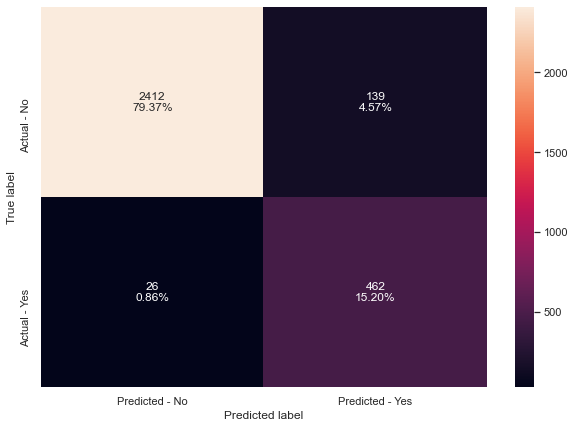

In [111]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- The AdaBoost tuned by grid search has raised its performance on test data 11% above the cross validation average recall score.
- The model is not overfitting the data.

### RandomizedSearchCV

In [112]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1, class_weight="balanced"),
        DecisionTreeClassifier(max_depth=2, random_state=1, class_weight="balanced"),
        DecisionTreeClassifier(max_depth=3, random_state=1, class_weight="balanced"),
    ]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=40, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 60, 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=1)} with CV score=0.9429438132776877:
Wall time: 29.3 s


In [113]:
# Creating new pipeline with best parameters
abc_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
abc_tuned2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                          max_depth=2,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=60,
                                    random_state=1))])

Accuracy on training set :  0.9538656884875847
Accuracy on test set :  0.945705824284304
Recall on training set :  0.9692712906057945
Recall on test set :  0.9467213114754098
Precision on training set :  0.7908309455587392
Precision on test set :  0.7687188019966722


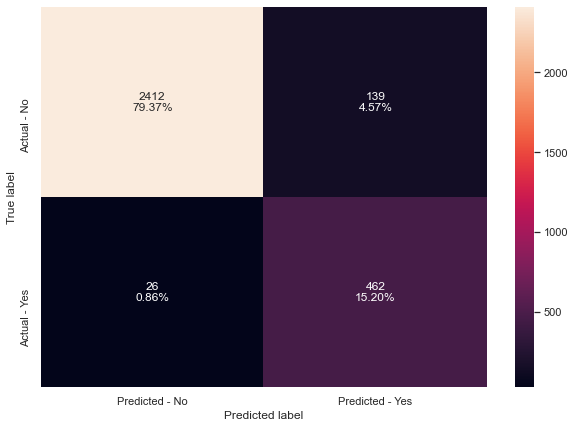

In [114]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

- The randomized search found the same model as the grid search did.
- The time was improved from 1 min 50 s to 28.9 s.

## Gradient Boosting Classifier

### GridSearchCV

In [115]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
              "gradientboostingclassifier__n_estimators": [100, 150, 200, 250],
              "gradientboostingclassifier__subsample": [0.8, 0.9, 1],
              "gradientboostingclassifier__max_features": [0.7, 0.8, 0.9, 1],
              "gradientboostingclassifier__min_impurity_decrease": [0, 0.00001, 0.0001, 0.001, 0.1],
              "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1, base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1, class_weight="balanced")),
                                                   DecisionTreeClassifier(max_depth=1, random_state=1, class_weight="balanced"),
                                                   DecisionTreeClassifier(max_depth=2, random_state=1, class_weight="balanced"),
                                                   DecisionTreeClassifier(max_depth=3, random_state=1, class_weight="balanced")
                                                  ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X=x_train, y=y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'gradientboostingclassifier__init': DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=1), 'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__min_impurity_decrease': 1e-05, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 1} 
Score: 0.8823672617667515
Wall time: 21min 54s


In [116]:
# Creating new pipeline with best parameters
gbc_tuned1 = grid_cv.best_estimator_

# Fit the model on training data
gbc_tuned1.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=DecisionTreeClassifier(class_weight='balanced',
                                                                        max_depth=2,
                                                                        random_state=1),
                                            max_features=0.7,
                                            min_impurity_decrease=1e-05,
                                            n_estimators=250, random_state=1,
                                            subsample=1))])

Accuracy on training set :  0.988431151241535
Accuracy on test set :  0.9733464955577492
Recall on training set :  0.9499561018437226
Recall on test set :  0.8954918032786885
Precision on training set :  0.9774164408310749
Precision on test set :  0.9357601713062098


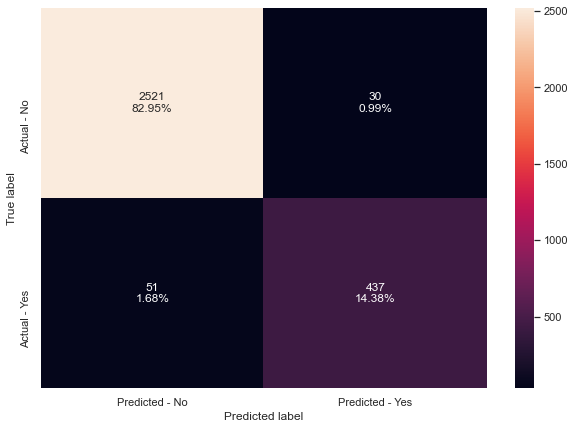

In [117]:
# Calculating different metrics
get_metrics_score(gbc_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

- The tuned gradient boosting classifier has improved the recall score from 83.3% on the cross validation score to about 89.5% on the test score.
- The model is overfitting the training data.

### RandomizedSearchCV

In [118]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
              "gradientboostingclassifier__n_estimators": [100, 150, 200, 250],
              "gradientboostingclassifier__subsample": [0.8, 0.9, 1],
              "gradientboostingclassifier__max_features": [0.7, 0.8, 0.9, 1],
              "gradientboostingclassifier__min_impurity_decrease": [0, 0.00001, 0.0001, 0.001, 0.1],
              "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1, base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1, class_weight="balanced")),
                                                   DecisionTreeClassifier(max_depth=1, random_state=1),
                                                   DecisionTreeClassifier(max_depth=2, random_state=1),
                                                   DecisionTreeClassifier(max_depth=3, random_state=1)
                                                  ]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=40, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.9, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__min_impurity_decrease': 0.0001, 'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__init': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   random_state=1)} with CV score=0.8753535821933689:
Wall time: 1min 6s


In [119]:
# Creating new pipeline with best parameters
gbc_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
gbc_tuned2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                                          max_depth=1,
                                                                                                          random_state=1),
                                                                    random_state=1),
                                            max_features=0.8,
                                            min_impurity_decrease=0.0001,
                                            n_estimators=250, random_state=1,
                                            subsample=0.9))])

Accuracy on training set :  0.988854401805869
Accuracy on test set :  0.9766370516617309
Recall on training set :  0.95171202809482
Recall on test set :  0.9057377049180327
Precision on training set :  0.9783393501805054
Precision on test set :  0.9464668094218416


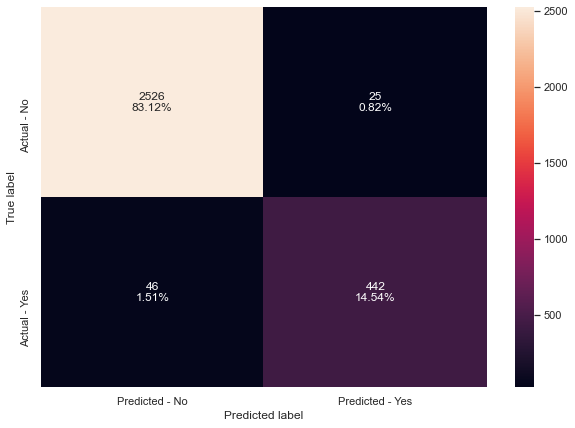

In [120]:
# Calculating different metrics
get_metrics_score(gbc_tuned2)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

- Randomized search produced slightly better performance than grid search.
- The model is performing well on the test data but is overfitting the training data.
- Randomized search decreased the search time from 22 min 5 s to 1 min 7 s.

## XGBoost Classifier

### GridSearchCV

In [121]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False))

# Parameter grid to pass in GridSearchCV
param_grid = {
              "xgbclassifier__n_estimators": np.arange(30,100,20),
              "xgbclassifier__subsample": [0.5, 0.7, 1],
              "xgbclassifier__learning_rate": [0.001, 0.01, 0.05, 0.1],
              "xgbclassifier__colsample_bytree": [0.5, 0.7, 1],
              "xgbclassifier__colsample_bylevel": [0.5, 0.7, 1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X=x_train, y=y_train)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'xgbclassifier__colsample_bylevel': 1, 'xgbclassifier__colsample_bytree': 1, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__n_estimators': 90, 'xgbclassifier__subsample': 0.5} 
Score: 0.8700749671535668
Wall time: 4min 5s


In [122]:
# Creating new pipeline with best parameters
xgb_tuned1 = grid_cv.best_estimator_

# Fit the model on training data
xgb_tuned1.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=90,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.5, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None

Accuracy on training set :  0.9911117381489842
Accuracy on test set :  0.9763079960513327
Recall on training set :  0.9648814749780509
Recall on test set :  0.9077868852459017
Precision on training set :  0.9795008912655971
Precision on test set :  0.9425531914893617


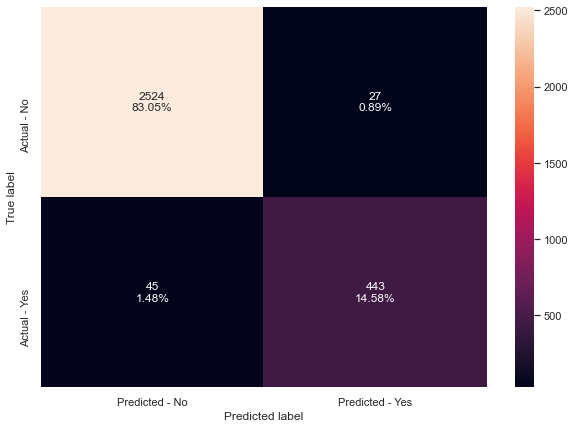

In [123]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The turned XGBoost model improved over the cross validation score by 4%.
- This model is overfitting the training data but is performing well on Accuracy and Precision.

### RandomizedSearchCV

In [124]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
              "xgbclassifier__n_estimators": np.arange(30,100,20),
              "xgbclassifier__subsample": [0.5, 0.7, 1],
              "xgbclassifier__learning_rate": [0.001, 0.01, 0.05, 0.1],
              "xgbclassifier__colsample_bytree": [0.5, 0.7, 1],
              "xgbclassifier__colsample_bylevel": [0.5, 0.7, 1]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=40, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.5, 'xgbclassifier__n_estimators': 90, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__colsample_bytree': 1, 'xgbclassifier__colsample_bylevel': 0.7} with CV score=0.870067238581034:
Wall time: 24.1 s


In [125]:
# Creating new pipeline with best parameters
xgb_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
xgb_tuned2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.7, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=90,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.5, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=No

Accuracy on training set :  0.9901241534988713
Accuracy on test set :  0.9749917736097401
Recall on training set :  0.9552238805970149
Recall on test set :  0.8995901639344263
Precision on training set :  0.982836495031617
Precision on test set :  0.9420600858369099


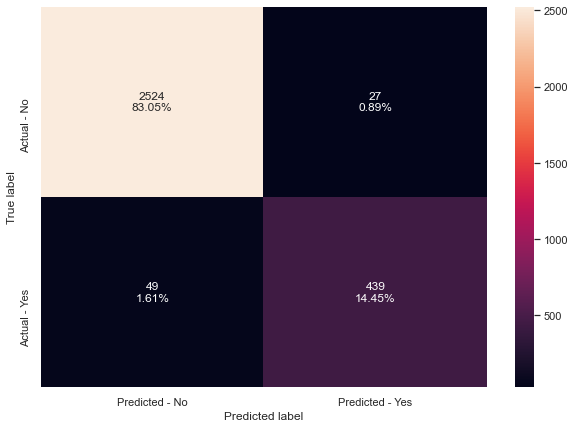

In [126]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- Randomized search is performing nearly as well as the grid search while dividing the runtime by 10.
- This model is overfitting the training data.

## Comparing all models

In [127]:
# defining list of models
models = [lrSmote, lrDown, lrRandomDown, 
          dtree_tuned1, dtree_tuned2,
          rf_tuned1, rf_tuned2,
          abc_tuned1, abc_tuned2,
          gbc_tuned1, gbc_tuned2,
          xgb_tuned1, xgb_tuned2
         ]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [128]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression with SMOTE",
            "Logistic Regression with Undersampling Custom",
            "Logistic Regression with Undersampling Builtin",
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "Random Forest with GridSearchCV",
            "Random Forest with RandomizedSearchCV",
            "Adaboost with GridSearchCV",
            "Adaboost with RandomizedSearchCV",
            "Gradient Boost with GridSearchCV",
            "Gradient Boost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV"    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  \
7                       Adaboost with GridSearchCV        0.953866   
8                 Adaboost with RandomizedSearchCV        0.953866   
6            Random Forest with RandomizedSearchCV        0.956264   
11                       XGBoost with GridSearchCV        0.991112   
5                  Random Forest with GridSearchCV        0.959368   
10          Gradient Boost with RandomizedSearchCV        0.988854   
12                 XGBoost with RandomizedSearchCV        0.990124   
9                 Gradient Boost with GridSearchCV        0.988431   
3                  Decision Tree with GridSearchCV        0.875282   
4            Decision Tree with RandomizedSearchCV        0.875282   
1    Logistic Regression with Undersampling Custom        0.847912   
2   Logistic Regression with Undersampling Builtin        0.847912   
0                   Logistic Regression with SMOTE        0.884312   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
7        0.945706      0.969271     0.946721         0.790831        0.768719  
8        0.945706      0.969271     0.946721         0.790831        0.768719  
6        0.942086      0.971905     0.926230         0.799278        0.763514  
11       0.976308      0.964881     0.907787         0.979501        0.942553  
5        0.939783      0.971905     0.905738         0.812179        0.763385  
10       0.976637      0.951712     0.905738         0.978339        0.946467  
12       0.974992      0.955224     0.899590         0.982836        0.942060  
9        0.973346      0.949956     0.895492         0.977416        0.935760  
3        0.859164      0.913082     0.893443         0.569863        0.536946  
4        0.859164      0.913082     0.893443         0.569863        0.536946  
1        0.840737      0.855136     0.864754         0.516163        0.502381  
2        0.840737      0.855136     0.864754         0.516163        0.502381  
0        0.882198      0.676910     0.698770         0.630417        0.617754

- Adaboost ended up being the best model.  It has both the highest recall score and it is not overfitting the training data.
    - Adaboost with GridSearchCV and RandomizedSearchCV provided the same model.
- Throughout training, RandomizedSearchCV gave very similar results as compared to GridSearchCV, however it did so in a fraction of the time.

## AdaBoost Classifier Feature Importance

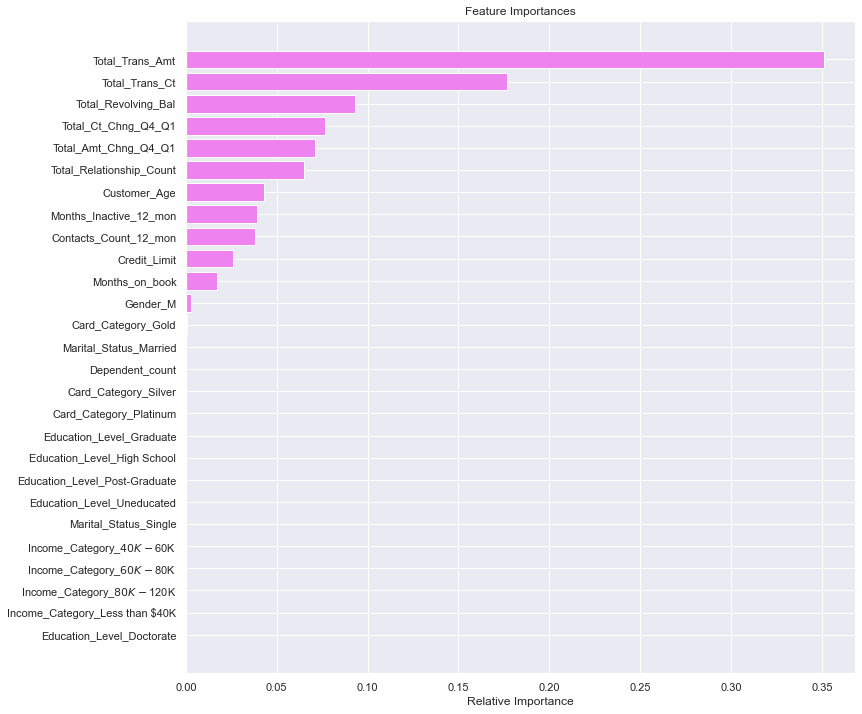

In [129]:
feature_names = x_train.columns
indexTopModel = comparison_frame.sort_values(by="Test_Recall", ascending=False).index[0]
importances = models[indexTopModel][1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The top model ended up using slightly less than half of the available features.
    - This creates a simplier model which will perform more swiftly in production and requires less information from customers.
    - Specifically, this model only uses features that the bank will automatically have or are commonly provided by the customer like gender and age.
- Income, marital status, education and number of dependents were completely unused by the model.

# Recommendations and Insights

- From the exploratory data analysis (EDA) we learned:
    - Customers who utilize their card more are more likely to keep the card.  Therefore, the bank may want to increase or create a rewards program for credit card use.
        - Common examples include airplane miles, cash back, etc.
    - All customers who were contacted six times attrited.  Therefore, the bank really needs to recapture customers before the fifth contact.
    - The bank seems to have good brand loyalty.  Customers who own more than two products are far less likely to attrite.  If the bank can better communicate and market other products to existing customers who have a low number of products it can go a long way to retaining those customers.
    - The platinum card had a significantly higher attrition rate in comparison to the other card tiers.  The platinum card may need to be revamped to better appeal to customers over the long term.
    - Customers who were never inactive were vastly more likely to attrite.
        - Since we saw attrition did not depend much at all on how long a customer was with the bank, this needs to be investigated further to determine what types of customers who are always active are leaving.
- From the top model (AdaBoost) we learned:
    - The amount a customer uses their card, especially their total transaction amount and total transaction count, is critical in predicting whether a customer will attrite.
    - Building in ways to promote customers actively utilizing their card will definitely improve customer retention.